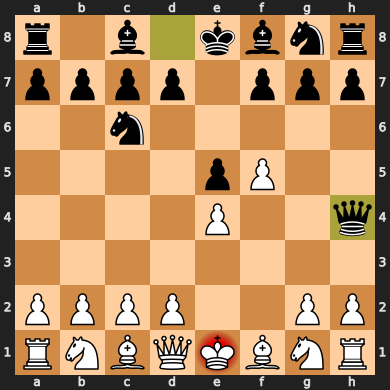

Best move: d8h4, Eval: -1.569999999999272
Your move:
Invalid move. Try again:
Total game time = 125.543 seconds


InvalidMoveError: expected uci string to be of length 4 or 5: ''

In [15]:
import chess
from IPython.display import clear_output
from bot import Bot, game_manager
import test_bot

# Add promotion stuff

if __name__ == "__main__":

    chess_bot = Bot()  # you can enter a FEN here, like Bot("...")
    with game_manager():

        playing = True
        player_playing = True
        depth = 5

        while playing:
            if chess_bot.board.turn:
                if player_playing:
                    print(chess_bot.get_eval())
                    print("Your move:")
                    move = input()
                    while not chess.Move.from_uci(move) in chess_bot.board.legal_moves:
                        print("Invalid move. Try again:")
                        move = input()
                    clear_output()
                    chess_bot.board.push_san(move)
                else:
                    chess_bot.board.push_san(test_bot.get_move(chess_bot.board))
            else:
                chess_bot.board.push_san(chess_bot.next_move(depth))
            #print(chess_bot.board, end="\n\n")
            clear_output()
            display(chess_bot.board)
            print(chess_bot.get_eval())

            if chess_bot.board.is_game_over():
                if chess_bot.board.is_stalemate():
                    print("Is stalemate")
                elif chess_bot.board.is_insufficient_material():
                    print("Is insufficient material")

                # EX: Outcome(termination=<Termination.CHECKMATE: 1>, winner=True)
                print(chess_bot.board.outcome())

                playing = False



## TT Testing

In [2]:
from bot import TranspositionTable
tt = TranspositionTable()
board = chess.Board('rnbqkb1r/pppppppp/7n/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 1 2')
print(tt.zobrist_hash(board))
board = chess.Board('rnbqkb1r/pppppppp/5n2/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 1 2')
print(tt.zobrist_hash(board))

2892945207429728887
7670125323384886094


In [29]:
from pieceTables import piece_tables, convert_piece_table, reverse_table
piece_tables = {piece: convert_piece_table(piece_table) for piece, piece_table in piece_tables.items()}
for square in chess.SQUARES:
    print(square, end=" ")
    print(piece_tables[chess.PAWN][square], end=" ")
    print(reverse_table(piece_tables[chess.PAWN])[square], end=" ")
    print(piece_tables[chess.KNIGHT][63 - square], end=" ")
    print()

0 0 0 -50 
1 0 0 -40 
2 0 0 -30 
3 0 0 -30 
4 0 0 -30 
5 0 0 -30 
6 0 0 -40 
7 0 0 -50 
8 5 50 -40 
9 10 50 -20 
10 10 50 0 
11 -20 50 0 
12 -20 50 0 
13 10 50 0 
14 10 50 -20 
15 5 50 -40 
16 5 10 -30 
17 -5 10 0 
18 -10 20 10 
19 0 30 15 
20 0 30 15 
21 -10 20 10 
22 -5 10 0 
23 5 10 -30 
24 0 5 -30 
25 0 5 5 
26 0 10 15 
27 20 25 20 
28 20 25 20 
29 0 10 15 
30 0 5 5 
31 0 5 -30 
32 5 0 -30 
33 5 0 0 
34 10 0 15 
35 25 20 20 
36 25 20 20 
37 10 0 15 
38 5 0 0 
39 5 0 -30 
40 10 5 -30 
41 10 -5 5 
42 20 -10 10 
43 30 0 15 
44 30 0 15 
45 20 -10 10 
46 10 -5 5 
47 10 5 -30 
48 50 5 -40 
49 50 10 -20 
50 50 10 0 
51 50 -20 5 
52 50 -20 5 
53 50 10 0 
54 50 10 -20 
55 50 5 -40 
56 0 0 -50 
57 0 0 -40 
58 0 0 -30 
59 0 0 -30 
60 0 0 -30 
61 0 0 -30 
62 0 0 -40 
63 0 0 -50 


## Evaluate Function Testing

f

In [2]:
from bot import Bot
import chess
b = Bot()
board = chess.Board()
board.push_san("e2e4")
board.push_san("e7e5")
board.push_san("g1f3")
board.push_san("h7h6")
board.push_san("f3e5")

print(b.evaluate(board))
print(b.get_ordered_moves(board))
print(board)

1.6499999999999995
[Move.from_uci('f7f6'), Move.from_uci('d7d6'), Move.from_uci('g8e7'), Move.from_uci('g8f6'), Move.from_uci('f8e7'), Move.from_uci('f8d6'), Move.from_uci('f8c5'), Move.from_uci('f8b4'), Move.from_uci('f8a3'), Move.from_uci('b8c6'), Move.from_uci('b8a6'), Move.from_uci('d7d5'), Move.from_uci('h8h7'), Move.from_uci('e8e7'), Move.from_uci('d8e7'), Move.from_uci('d8f6'), Move.from_uci('d8g5'), Move.from_uci('d8h4'), Move.from_uci('g7g6'), Move.from_uci('c7c6'), Move.from_uci('b7b6'), Move.from_uci('a7a6'), Move.from_uci('h6h5'), Move.from_uci('g7g5'), Move.from_uci('f7f5'), Move.from_uci('c7c5'), Move.from_uci('b7b5'), Move.from_uci('a7a5')]
r n b q k b n r
p p p p . p p .
. . . . . . . p
. . . . N . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B . R


## Bot vs Bot (testing)

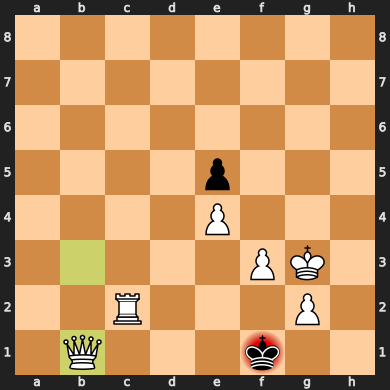

Outcome(termination=<Termination.CHECKMATE: 1>, winner=True)
Total game time = 711.279 seconds
===== GAME ENDED =====


In [4]:
import chess
from IPython.display import clear_output
from bot import Bot, game_manager
from bot2 import Bot2

def player_move(board, player_playing, bot, color, depth=5):
    move = None
    if player_playing:
        print("Your move:")
        move = input()
        while not chess.Move.from_uci(move) in board.legal_moves:
            print("Invalid move. Try again:")
            move = input()
        clear_output()
    else:
        move = bot.next_move(color, depth)
    return move

if __name__ == "__main__":
    fen = None
    test_bot = Bot2(fen)  # older version of bot for testing
    chess_bot = Bot(fen)
    with game_manager():
        playing = True
        player_playing = True
        bot_is_white = False
        test_bot_depth = 5
        while playing:
            move = None
            if bot_is_white:
                if chess_bot.board.turn:
                    move = chess_bot.next_move(1, 5)
                else:
                    move = player_move(chess_bot.board, player_playing, test_bot, False, 5)
            else:
                if chess_bot.board.turn:
                    move = player_move(chess_bot.board, player_playing, test_bot, True, 5)
                else:
                    move = chess_bot.next_move(-1, 5)

            chess_bot.board.push_san(move)
            if not player_playing:
                test_bot.board.push_san(move)                
            
            clear_output()
            display(chess_bot.board)

            if chess_bot.board.is_game_over():
                if chess_bot.board.is_stalemate():
                    print("Is stalemate")
                elif chess_bot.board.is_insufficient_material():
                    print("Is insufficient material")

                # EX: Outcome(termination=<Termination.CHECKMATE: 1>, winner=True)
                print(chess_bot.board.outcome())
                playing = False

## Export PGN

0.029999999999417604
[Move.from_uci('e7e5'), Move.from_uci('g8f6'), Move.from_uci('b8c6'), Move.from_uci('g8h6'), Move.from_uci('b8a6'), Move.from_uci('d7d5'), Move.from_uci('e7e6'), Move.from_uci('d7d6'), Move.from_uci('h7h5'), Move.from_uci('f7f5'), Move.from_uci('a7a5'), Move.from_uci('h7h6'), Move.from_uci('a7a6'), Move.from_uci('c7c5'), Move.from_uci('g7g6'), Move.from_uci('f7f6'), Move.from_uci('b7b6'), Move.from_uci('g7g5'), Move.from_uci('b7b5'), Move.from_uci('c7c6')]


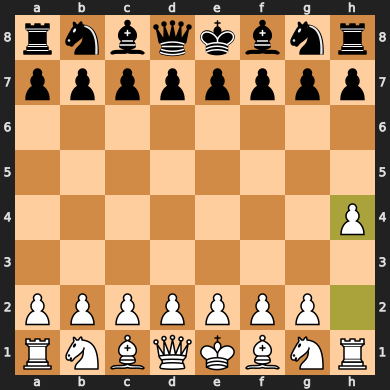

-0.4349999999985448
[Move.from_uci('b1c3'), Move.from_uci('g1f3'), Move.from_uci('g1h3'), Move.from_uci('b1a3'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('e2e4'), Move.from_uci('d2d4'), Move.from_uci('e2e3'), Move.from_uci('d2d3'), Move.from_uci('c2c4'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('a2a3'), Move.from_uci('f2f4'), Move.from_uci('g2g3'), Move.from_uci('c2c3'), Move.from_uci('b2b3'), Move.from_uci('g2g4'), Move.from_uci('b2b4'), Move.from_uci('f2f3')]


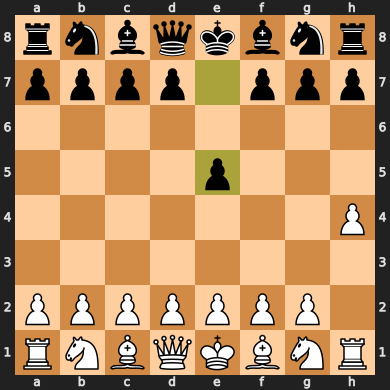

-0.13499999999745338
[Move.from_uci('f8b4'), Move.from_uci('d8h4'), Move.from_uci('g8f6'), Move.from_uci('b8c6'), Move.from_uci('g8e7'), Move.from_uci('f8c5'), Move.from_uci('d7d6'), Move.from_uci('f8d6'), Move.from_uci('f7f6'), Move.from_uci('f8e7'), Move.from_uci('d8f6'), Move.from_uci('d8e7'), Move.from_uci('d8g5'), Move.from_uci('g8h6'), Move.from_uci('f8a3'), Move.from_uci('e8e7'), Move.from_uci('b8a6'), Move.from_uci('d7d5'), Move.from_uci('h7h5'), Move.from_uci('f7f5'), Move.from_uci('a7a5'), Move.from_uci('e5e4'), Move.from_uci('h7h6'), Move.from_uci('a7a6'), Move.from_uci('c7c5'), Move.from_uci('g7g6'), Move.from_uci('b7b6'), Move.from_uci('g7g5'), Move.from_uci('b7b5'), Move.from_uci('c7c6')]


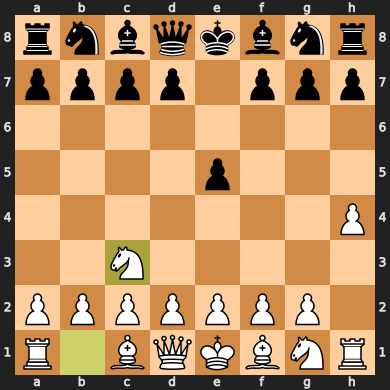

-0.3349999999980353
[Move.from_uci('g1f3'), Move.from_uci('a2a3'), Move.from_uci('c3d5'), Move.from_uci('c3e4'), Move.from_uci('a1b1'), Move.from_uci('g1h3'), Move.from_uci('c3b5'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('c3a4'), Move.from_uci('c3b1'), Move.from_uci('e2e4'), Move.from_uci('d2d4'), Move.from_uci('e2e3'), Move.from_uci('d2d3'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('f2f4'), Move.from_uci('g2g3'), Move.from_uci('b2b3'), Move.from_uci('g2g4'), Move.from_uci('f2f3')]


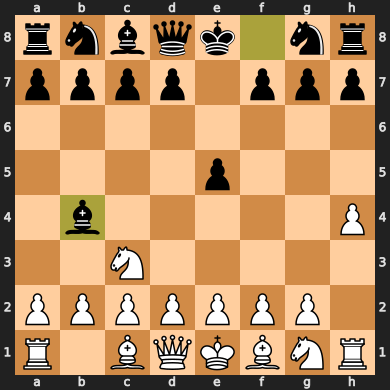

0.18500000000058225
[Move.from_uci('g8e7'), Move.from_uci('b4a5'), Move.from_uci('d8h4'), Move.from_uci('b4c3'), Move.from_uci('g8f6'), Move.from_uci('b8c6'), Move.from_uci('d7d6'), Move.from_uci('c7c5'), Move.from_uci('f7f6'), Move.from_uci('d8f6'), Move.from_uci('e8f8'), Move.from_uci('d8e7'), Move.from_uci('d8g5'), Move.from_uci('g8h6'), Move.from_uci('e8e7'), Move.from_uci('b8a6'), Move.from_uci('b4c5'), Move.from_uci('b4e7'), Move.from_uci('b4d6'), Move.from_uci('b4f8'), Move.from_uci('b4a3'), Move.from_uci('d7d5'), Move.from_uci('h7h5'), Move.from_uci('f7f5'), Move.from_uci('a7a5'), Move.from_uci('h7h6'), Move.from_uci('a7a6'), Move.from_uci('g7g6'), Move.from_uci('b7b6'), Move.from_uci('g7g5'), Move.from_uci('b7b5'), Move.from_uci('c7c6')]


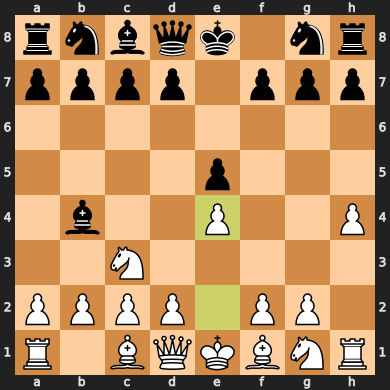

-0.06499999999869033
[Move.from_uci('a2a3'), Move.from_uci('f1b5'), Move.from_uci('c3d5'), Move.from_uci('d1g4'), Move.from_uci('g1f3'), Move.from_uci('g1e2'), Move.from_uci('f1c4'), Move.from_uci('d2d3'), Move.from_uci('f1d3'), Move.from_uci('f2f3'), Move.from_uci('f1e2'), Move.from_uci('d1f3'), Move.from_uci('d1e2'), Move.from_uci('a1b1'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('e1e2'), Move.from_uci('d1h5'), Move.from_uci('c3b5'), Move.from_uci('c3e2'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('c3a4'), Move.from_uci('c3b1'), Move.from_uci('d2d4'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('f2f4'), Move.from_uci('g2g3'), Move.from_uci('b2b3'), Move.from_uci('g2g4')]


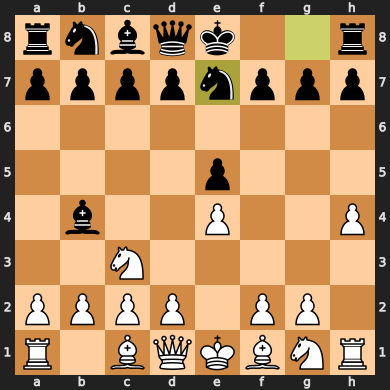

-0.27999999999883585
[Move.from_uci('b8c6'), Move.from_uci('b4a5'), Move.from_uci('h8g8'), Move.from_uci('b4c3'), Move.from_uci('d7d6'), Move.from_uci('c7c5'), Move.from_uci('f7f6'), Move.from_uci('e7d5'), Move.from_uci('e7f5'), Move.from_uci('h8f8'), Move.from_uci('e7c6'), Move.from_uci('b8a6'), Move.from_uci('e7g6'), Move.from_uci('b4c5'), Move.from_uci('b4d6'), Move.from_uci('b4a3'), Move.from_uci('e7g8'), Move.from_uci('d7d5'), Move.from_uci('h7h5'), Move.from_uci('f7f5'), Move.from_uci('a7a5'), Move.from_uci('h7h6'), Move.from_uci('a7a6'), Move.from_uci('g7g6'), Move.from_uci('b7b6'), Move.from_uci('g7g5'), Move.from_uci('b7b5'), Move.from_uci('c7c6'), Move.from_uci('e8g8'), Move.from_uci('e8f8')]


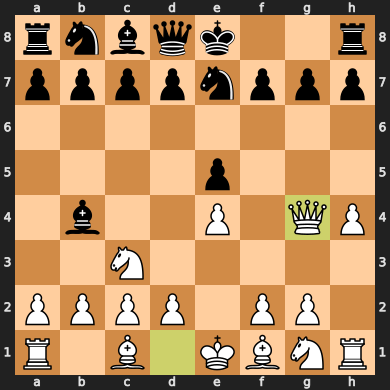

-0.6350000000002183
[Move.from_uci('g4g7'), Move.from_uci('g4d7'), Move.from_uci('f1b5'), Move.from_uci('c3d5'), Move.from_uci('a2a3'), Move.from_uci('c3b5'), Move.from_uci('g4g5'), Move.from_uci('g4h3'), Move.from_uci('g1f3'), Move.from_uci('g1e2'), Move.from_uci('f1c4'), Move.from_uci('d2d3'), Move.from_uci('f1d3'), Move.from_uci('f2f4'), Move.from_uci('f2f3'), Move.from_uci('f1e2'), Move.from_uci('g4e6'), Move.from_uci('g4f5'), Move.from_uci('g4f4'), Move.from_uci('g4f3'), Move.from_uci('a1b1'), Move.from_uci('g4g6'), Move.from_uci('g4g3'), Move.from_uci('g4e2'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('e1e2'), Move.from_uci('e1d1'), Move.from_uci('g4h5'), Move.from_uci('g4d1'), Move.from_uci('c3e2'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('c3a4'), Move.from_uci('c3b1'), Move.from_uci('c3d1'), Move.from_uci('d2d4'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('g2g3'), Move.from_uci('b2b3')]


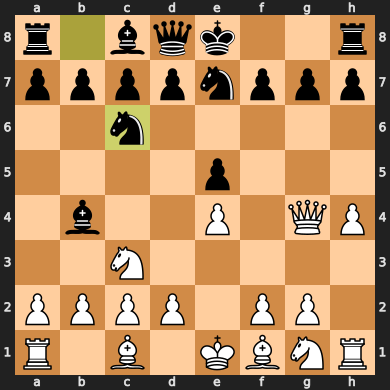

0.6550000000006548
[Move.from_uci('h8g8'), Move.from_uci('b4a5'), Move.from_uci('e7g6'), Move.from_uci('b4c3'), Move.from_uci('d7d6'), Move.from_uci('f7f5'), Move.from_uci('e7d5'), Move.from_uci('e7f5'), Move.from_uci('c6d4'), Move.from_uci('h8f8'), Move.from_uci('a8b8'), Move.from_uci('b4c5'), Move.from_uci('b4d6'), Move.from_uci('b4a3'), Move.from_uci('e7g8'), Move.from_uci('c6b8'), Move.from_uci('c6a5'), Move.from_uci('d7d5'), Move.from_uci('h7h5'), Move.from_uci('a7a5'), Move.from_uci('h7h6'), Move.from_uci('a7a6'), Move.from_uci('f7f6'), Move.from_uci('b7b6'), Move.from_uci('b7b5')]


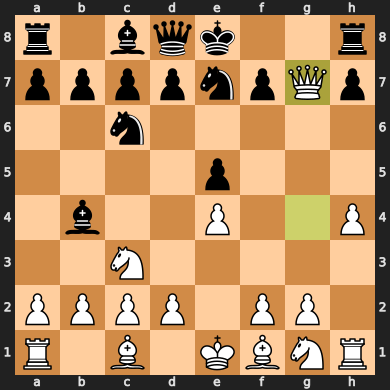

0.4750000000006551
[Move.from_uci('g7f7'), Move.from_uci('g7g8'), Move.from_uci('g7f8'), Move.from_uci('f1b5'), Move.from_uci('c3d5'), Move.from_uci('g7h7'), Move.from_uci('a2a3'), Move.from_uci('c3b5'), Move.from_uci('g7f6'), Move.from_uci('g7g5'), Move.from_uci('g7g4'), Move.from_uci('g7g3'), Move.from_uci('g7h6'), Move.from_uci('g7e5'), Move.from_uci('g1f3'), Move.from_uci('g1e2'), Move.from_uci('f1c4'), Move.from_uci('d2d3'), Move.from_uci('f1d3'), Move.from_uci('f2f3'), Move.from_uci('f1e2'), Move.from_uci('a1b1'), Move.from_uci('g7g6'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('e1e2'), Move.from_uci('e1d1'), Move.from_uci('c3e2'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('g7h8'), Move.from_uci('c3a4'), Move.from_uci('c3b1'), Move.from_uci('c3d1'), Move.from_uci('d2d4'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('f2f4'), Move.from_uci('g2g3'), Move.from_uci('b2b3'), Move.from_uci('g2g4')]


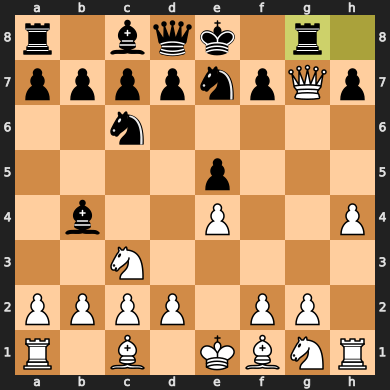

1.2749999999999275
[Move.from_uci('c6d4'), Move.from_uci('g8h8'), Move.from_uci('g8g7'), Move.from_uci('g8g4'), Move.from_uci('b4a5'), Move.from_uci('g8g2'), Move.from_uci('b4c3'), Move.from_uci('d7d6'), Move.from_uci('f7f6'), Move.from_uci('e7d5'), Move.from_uci('e7f5'), Move.from_uci('e8f8'), Move.from_uci('a8b8'), Move.from_uci('g8f8'), Move.from_uci('e7g6'), Move.from_uci('b4c5'), Move.from_uci('g8g6'), Move.from_uci('g8g5'), Move.from_uci('g8g3'), Move.from_uci('b4d6'), Move.from_uci('b4a3'), Move.from_uci('c6b8'), Move.from_uci('c6a5'), Move.from_uci('d7d5'), Move.from_uci('f7f5'), Move.from_uci('a7a5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('b7b5')]


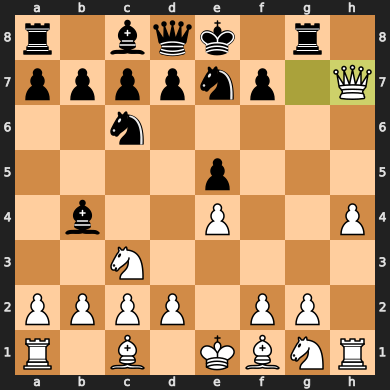

1.0800000000002186
[Move.from_uci('e1d1'), Move.from_uci('h7f7'), Move.from_uci('h7g8'), Move.from_uci('f1b5'), Move.from_uci('c3d5'), Move.from_uci('a2a3'), Move.from_uci('f1d3'), Move.from_uci('g1f3'), Move.from_uci('g1e2'), Move.from_uci('f1c4'), Move.from_uci('d2d3'), Move.from_uci('f2f3'), Move.from_uci('h7f5'), Move.from_uci('f1e2'), Move.from_uci('h7g7'), Move.from_uci('h7g6'), Move.from_uci('h7h5'), Move.from_uci('a1b1'), Move.from_uci('h7h6'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('c3b5'), Move.from_uci('c3e2'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('h7h8'), Move.from_uci('c3a4'), Move.from_uci('c3b1'), Move.from_uci('c3d1'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('f2f4'), Move.from_uci('g2g3'), Move.from_uci('b2b3'), Move.from_uci('g2g4')]


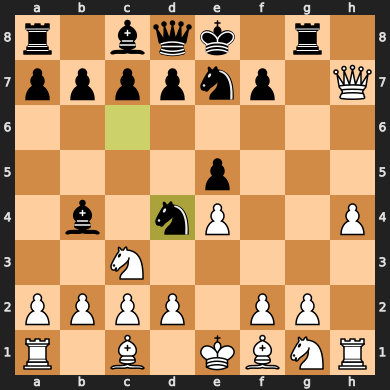

1.0800000000002186
[Move.from_uci('d7d5'), Move.from_uci('g8h8'), Move.from_uci('g8g7'), Move.from_uci('g8g4'), Move.from_uci('b4a5'), Move.from_uci('d4c2'), Move.from_uci('g8g2'), Move.from_uci('b4c3'), Move.from_uci('d7d6'), Move.from_uci('f7f5'), Move.from_uci('c7c5'), Move.from_uci('f7f6'), Move.from_uci('e7d5'), Move.from_uci('e7f5'), Move.from_uci('e8f8'), Move.from_uci('e7c6'), Move.from_uci('a8b8'), Move.from_uci('g8f8'), Move.from_uci('e7g6'), Move.from_uci('b4c5'), Move.from_uci('g8g6'), Move.from_uci('g8g5'), Move.from_uci('g8g3'), Move.from_uci('d4f5'), Move.from_uci('b4d6'), Move.from_uci('d4e6'), Move.from_uci('d4c6'), Move.from_uci('d4f3'), Move.from_uci('d4b5'), Move.from_uci('d4b3'), Move.from_uci('d4e2'), Move.from_uci('b4a3'), Move.from_uci('a7a5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('b7b5'), Move.from_uci('c7c6')]


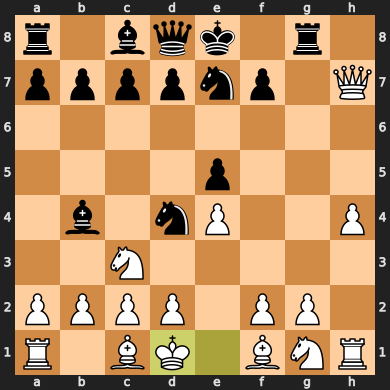

0.41499999999752646
[Move.from_uci('f1b5'), Move.from_uci('h7f7'), Move.from_uci('h7g8'), Move.from_uci('c3d5'), Move.from_uci('a2a3'), Move.from_uci('e4d5'), Move.from_uci('g1f3'), Move.from_uci('g1e2'), Move.from_uci('d2d3'), Move.from_uci('f1d3'), Move.from_uci('f2f3'), Move.from_uci('f1c4'), Move.from_uci('h7f5'), Move.from_uci('f1e2'), Move.from_uci('h7g7'), Move.from_uci('h7g6'), Move.from_uci('h7h5'), Move.from_uci('a1b1'), Move.from_uci('h7h6'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('d1e1'), Move.from_uci('c3b5'), Move.from_uci('c3e2'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('h7h8'), Move.from_uci('c3a4'), Move.from_uci('c3b1'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('f2f4'), Move.from_uci('g2g3'), Move.from_uci('b2b3'), Move.from_uci('g2g4')]


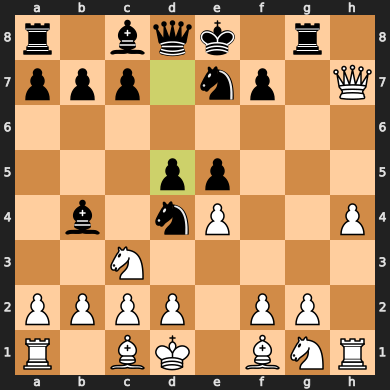

1.9649999999986179
[Move.from_uci('c8g4'), Move.from_uci('e7d5'), Move.from_uci('d8d5'), Move.from_uci('g8h8'), Move.from_uci('g8g7'), Move.from_uci('g8g4'), Move.from_uci('b4a5'), Move.from_uci('c7c6'), Move.from_uci('a7a5'), Move.from_uci('e7c6'), Move.from_uci('d4c2'), Move.from_uci('d8d6'), Move.from_uci('c7c5'), Move.from_uci('d4c6'), Move.from_uci('g8g2'), Move.from_uci('b4d2'), Move.from_uci('c8e6'), Move.from_uci('f7f5'), Move.from_uci('c8f5'), Move.from_uci('c8d7'), Move.from_uci('e7f5'), Move.from_uci('e8f8'), Move.from_uci('d8d7'), Move.from_uci('a8b8'), Move.from_uci('g8f8'), Move.from_uci('e8d7'), Move.from_uci('c8h3'), Move.from_uci('e7g6'), Move.from_uci('b4c5'), Move.from_uci('g8g6'), Move.from_uci('g8g5'), Move.from_uci('g8g3'), Move.from_uci('d4f5'), Move.from_uci('b4d6'), Move.from_uci('b4c3'), Move.from_uci('d4e6'), Move.from_uci('d4f3'), Move.from_uci('d4b5'), Move.from_uci('d4b3'), Move.from_uci('d4e2'), Move.from_uci('b4a3'), Move.from_uci('a7a6'), Move.from_uci(

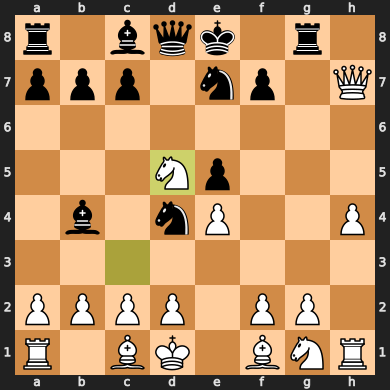

1.6899999999989817
[Move.from_uci('f2f3'), Move.from_uci('f1e2'), Move.from_uci('d1e1'), Move.from_uci('g1f3'), Move.from_uci('g1e2')]


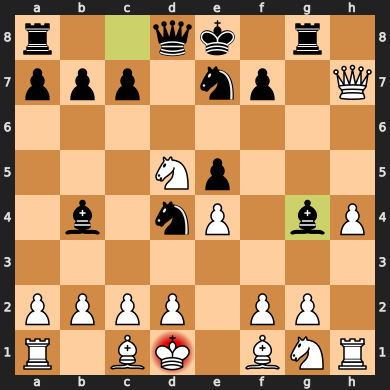

1.574999999997381
[Move.from_uci('g4f5'), Move.from_uci('g4f3'), Move.from_uci('e7d5'), Move.from_uci('d8d5'), Move.from_uci('g8h8'), Move.from_uci('g8g7'), Move.from_uci('b4a5'), Move.from_uci('c7c6'), Move.from_uci('a7a5'), Move.from_uci('e7c6'), Move.from_uci('d4c2'), Move.from_uci('d8d6'), Move.from_uci('c7c5'), Move.from_uci('d4c6'), Move.from_uci('g4d7'), Move.from_uci('g4e6'), Move.from_uci('g4h5'), Move.from_uci('g4c8'), Move.from_uci('d4f3'), Move.from_uci('b4d2'), Move.from_uci('f7f5'), Move.from_uci('e7f5'), Move.from_uci('e8f8'), Move.from_uci('d8d7'), Move.from_uci('a8c8'), Move.from_uci('a8b8'), Move.from_uci('g8f8'), Move.from_uci('e8d7'), Move.from_uci('e7g6'), Move.from_uci('b4c5'), Move.from_uci('g8g6'), Move.from_uci('g8g5'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('d4f5'), Move.from_uci('b4d6'), Move.from_uci('b4c3'), Move.from_uci('d4e6'), Move.from_uci('g4h3'), Move.from_uci('d4b5'), Move.from_uci('d4b3'), Move.from_uci('d4e2'), Move.from_uci('

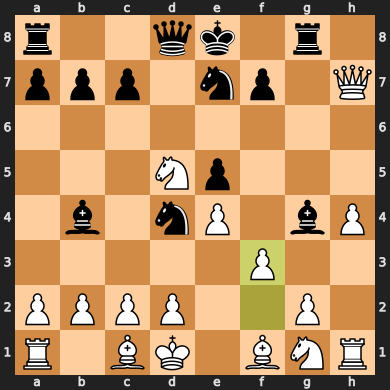

1.5499999999977447
[Move.from_uci('d5f6'), Move.from_uci('f1b5'), Move.from_uci('h7f7'), Move.from_uci('h7g8'), Move.from_uci('d5c7'), Move.from_uci('e4f5'), Move.from_uci('a2a3'), Move.from_uci('d5b4'), Move.from_uci('c2c3'), Move.from_uci('c2c4'), Move.from_uci('h7h5'), Move.from_uci('h7h6'), Move.from_uci('h7f5'), Move.from_uci('d5e7'), Move.from_uci('g1e2'), Move.from_uci('f1c4'), Move.from_uci('d2d3'), Move.from_uci('f1d3'), Move.from_uci('f1e2'), Move.from_uci('h7g7'), Move.from_uci('h7g6'), Move.from_uci('a1b1'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('d1e1'), Move.from_uci('d5f4'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('h7h8'), Move.from_uci('d5e3'), Move.from_uci('d5c3'), Move.from_uci('d5b6'), Move.from_uci('f3f4'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('g2g3'), Move.from_uci('b2b3'), Move.from_uci('g2g4')]


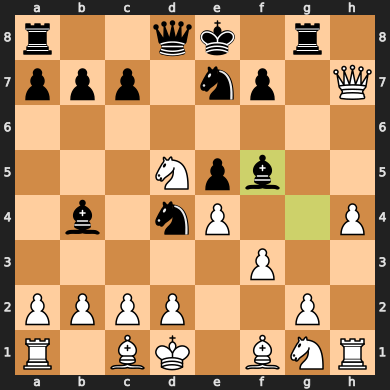

4.37344262294508
[Move.from_uci('f5h7'), Move.from_uci('d8e7'), Move.from_uci('e8e7'), Move.from_uci('b4e7'), Move.from_uci('b4a5'), Move.from_uci('d4c2'), Move.from_uci('d8d7'), Move.from_uci('f5g6'), Move.from_uci('g8f8'), Move.from_uci('g8h8'), Move.from_uci('g8g7'), Move.from_uci('g8g3'), Move.from_uci('f5d7'), Move.from_uci('f5e6'), Move.from_uci('f5c8'), Move.from_uci('g8g2'), Move.from_uci('f5e4'), Move.from_uci('d4f3'), Move.from_uci('b4d2'), Move.from_uci('c7c5'), Move.from_uci('f7f6'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('a8c8'), Move.from_uci('a8b8'), Move.from_uci('e8d7'), Move.from_uci('f5g4'), Move.from_uci('b4c5'), Move.from_uci('g8g6'), Move.from_uci('g8g5'), Move.from_uci('g8g4'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('b4d6'), Move.from_uci('b4c3'), Move.from_uci('d4e6'), Move.from_uci('d4c6'), Move.from_uci('f5h3'), Move.from_uci('d4b5'), Move.from_uci('d4b3'), Move.from_uci('d4e2'), Move.from_uci('b4a3'), Move.from_uci('a

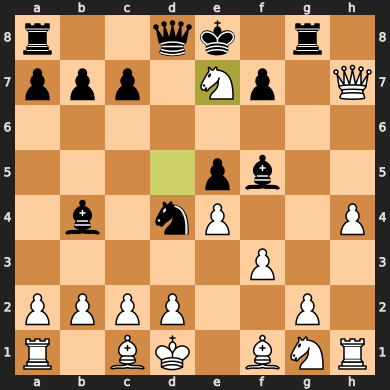

-3.7650409836080065
[Move.from_uci('e7g8'), Move.from_uci('f1b5'), Move.from_uci('e7f5'), Move.from_uci('a2a3'), Move.from_uci('c2c3'), Move.from_uci('g1e2'), Move.from_uci('f1c4'), Move.from_uci('d2d3'), Move.from_uci('f1d3'), Move.from_uci('e7d5'), Move.from_uci('f1e2'), Move.from_uci('e7c6'), Move.from_uci('a1b1'), Move.from_uci('e7g6'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('d1e1'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('e7c8'), Move.from_uci('f3f4'), Move.from_uci('c2c4'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('g2g3'), Move.from_uci('b2b3')]


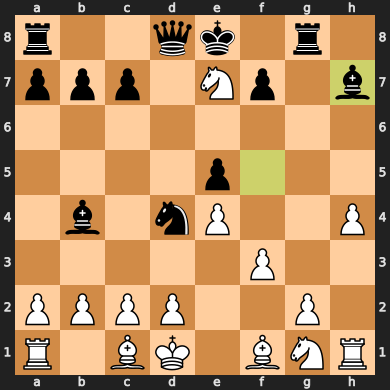

1.050614754096023
[Move.from_uci('h7g8'), Move.from_uci('b4a5'), Move.from_uci('d4c2'), Move.from_uci('h7e4'), Move.from_uci('d8h4'), Move.from_uci('d4f3'), Move.from_uci('b4d2'), Move.from_uci('h7g6'), Move.from_uci('h7f5'), Move.from_uci('d8f6'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('e8d7'), Move.from_uci('d8e7'), Move.from_uci('d8d7'), Move.from_uci('d8g5'), Move.from_uci('a8c8'), Move.from_uci('a8b8'), Move.from_uci('e8f8'), Move.from_uci('b4c5'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('d4f5'), Move.from_uci('b4e7'), Move.from_uci('b4d6'), Move.from_uci('b4c3'), Move.from_uci('d4e6'), Move.from_uci('d4c6'), Move.from_uci('d4b5'), Move.from_uci('d4b3'), Move.from_uci('d4e2'), Move.from_uci('b4f8'), Move.from_uci('b4a3'), Move.from_uci('f7f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('a7a6'), Move.from_uci('b7b5'), Move.from_uci('f7f6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


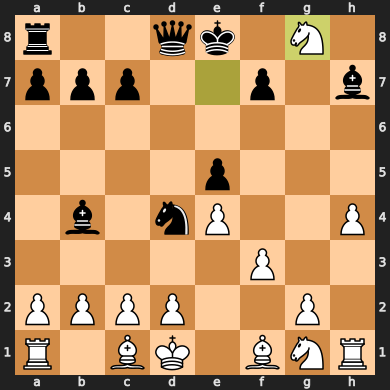

-1.4108606557406893
[Move.from_uci('h4h5'), Move.from_uci('f1b5'), Move.from_uci('g1e2'), Move.from_uci('f1c4'), Move.from_uci('a2a3'), Move.from_uci('c2c3'), Move.from_uci('f1d3'), Move.from_uci('f1e2'), Move.from_uci('a1b1'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('d1e1'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('f3f4'), Move.from_uci('d2d3'), Move.from_uci('c2c4'), Move.from_uci('a2a4'), Move.from_uci('g2g4'), Move.from_uci('g2g3'), Move.from_uci('b2b3')]


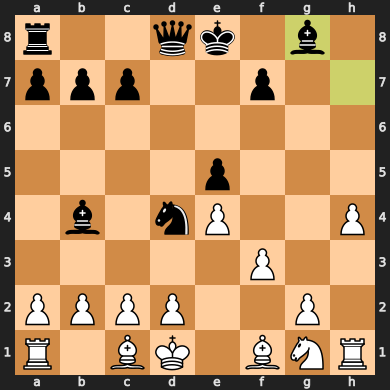

-1.4856147541018436
[Move.from_uci('b4c3'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('d8d6'), Move.from_uci('d8e7'), Move.from_uci('d8d7'), Move.from_uci('b4c5'), Move.from_uci('b4e7'), Move.from_uci('b4d6'), Move.from_uci('d4e6'), Move.from_uci('d4c6'), Move.from_uci('b4a5'), Move.from_uci('d4b5'), Move.from_uci('d4c2'), Move.from_uci('b4f8'), Move.from_uci('d8h4'), Move.from_uci('d4f3'), Move.from_uci('d8f6'), Move.from_uci('d8d5'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('g8h7'), Move.from_uci('d8g5'), Move.from_uci('a8c8'), Move.from_uci('a8b8'), Move.from_uci('e8f8'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('d4f5'), Move.from_uci('d4b3'), Move.from_uci('d4e2'), Move.from_uci('b4a3'), Move.from_uci('f7f5'), Move.from_uci('b7b5'), Move.from_uci('a7a6'), Move.from_uci('f7f6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


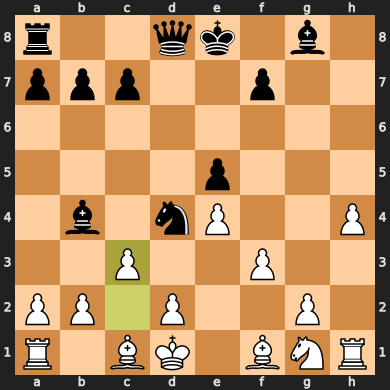

-2.443483606559821
[Move.from_uci('b2c3'), Move.from_uci('f1b5'), Move.from_uci('d2c3'), Move.from_uci('g1e2'), Move.from_uci('f1c4'), Move.from_uci('f1d3'), Move.from_uci('f1e2'), Move.from_uci('a1b1'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('d1e1'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('f3f4'), Move.from_uci('d2d3'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('b2b4'), Move.from_uci('a2a3'), Move.from_uci('g2g3'), Move.from_uci('b2b3')]


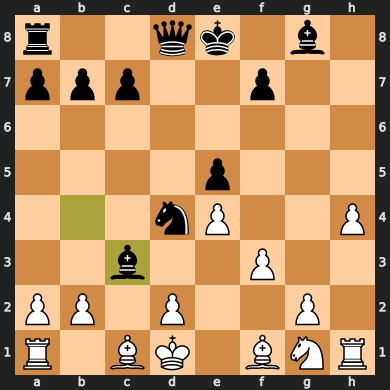

0.8061885245868323
[Move.from_uci('d4c6'), Move.from_uci('c7c5'), Move.from_uci('d8d6'), Move.from_uci('d8d7'), Move.from_uci('d4e6'), Move.from_uci('d4b5'), Move.from_uci('d4c2'), Move.from_uci('d8h4'), Move.from_uci('d4f3'), Move.from_uci('d8f6'), Move.from_uci('d8d5'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('g8h7'), Move.from_uci('d8e7'), Move.from_uci('d8g5'), Move.from_uci('a8c8'), Move.from_uci('a8b8'), Move.from_uci('e8f8'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('d4f5'), Move.from_uci('d4b3'), Move.from_uci('d4e2'), Move.from_uci('f7f5'), Move.from_uci('a7a5'), Move.from_uci('b7b5'), Move.from_uci('a7a6'), Move.from_uci('f7f6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


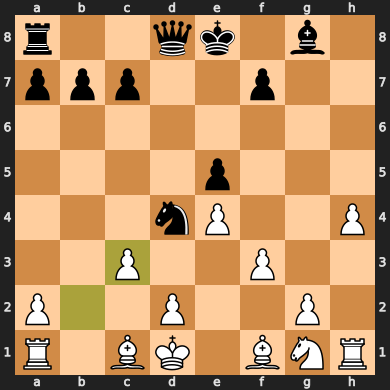

1.0011885245865413
[Move.from_uci('f3f4'), Move.from_uci('f1c4'), Move.from_uci('g1e2'), Move.from_uci('f1b5'), Move.from_uci('c1b2'), Move.from_uci('f1d3'), Move.from_uci('f1e2'), Move.from_uci('d1e2'), Move.from_uci('c1a3'), Move.from_uci('d1c2'), Move.from_uci('a1b1'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('d1e1'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('d2d4'), Move.from_uci('c3c4'), Move.from_uci('d2d3'), Move.from_uci('a2a4'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('a2a3'), Move.from_uci('g2g3')]


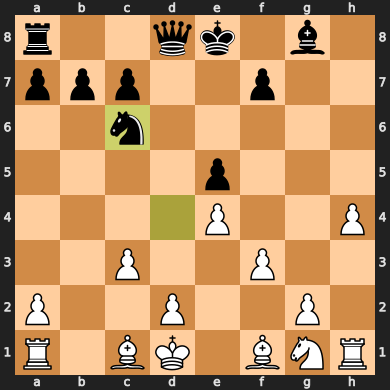

1.1089754098327829
[Move.from_uci('f7f6'), Move.from_uci('d8d2'), Move.from_uci('d8f6'), Move.from_uci('d8d6'), Move.from_uci('d8d7'), Move.from_uci('d8h4'), Move.from_uci('d8d5'), Move.from_uci('d8d4'), Move.from_uci('d8d3'), Move.from_uci('c6d4'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('g8h7'), Move.from_uci('d8e7'), Move.from_uci('d8g5'), Move.from_uci('a8c8'), Move.from_uci('a8b8'), Move.from_uci('e8f8'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('c6e7'), Move.from_uci('c6b4'), Move.from_uci('c6b8'), Move.from_uci('c6a5'), Move.from_uci('f7f5'), Move.from_uci('a7a5'), Move.from_uci('b7b5'), Move.from_uci('a7a6'), Move.from_uci('b7b6')]


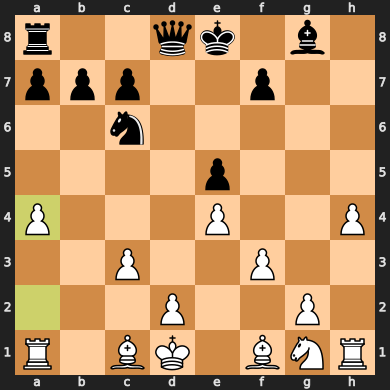

1.0404508196686946
[Move.from_uci('a1b1'), Move.from_uci('g1e2'), Move.from_uci('f1b5'), Move.from_uci('f1c4'), Move.from_uci('c1b2'), Move.from_uci('f1d3'), Move.from_uci('f1e2'), Move.from_uci('d1e2'), Move.from_uci('c1a3'), Move.from_uci('d1c2'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('d1e1'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('a1a3'), Move.from_uci('a1a2'), Move.from_uci('d2d4'), Move.from_uci('f3f4'), Move.from_uci('c3c4'), Move.from_uci('d2d3'), Move.from_uci('h4h5'), Move.from_uci('a4a5'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


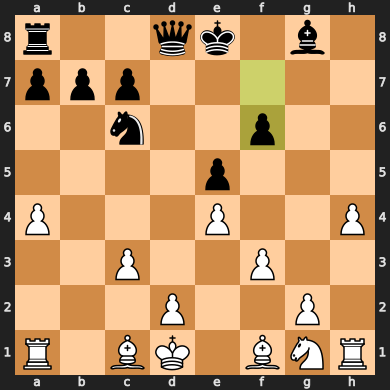

1.1654508196705136
[Move.from_uci('g8b3'), Move.from_uci('d8d2'), Move.from_uci('g8d5'), Move.from_uci('g8e6'), Move.from_uci('g8c4'), Move.from_uci('g8f7'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('d8d4'), Move.from_uci('d8d3'), Move.from_uci('c6d4'), Move.from_uci('e8d7'), Move.from_uci('g8h7'), Move.from_uci('d8e7'), Move.from_uci('d8d7'), Move.from_uci('a8c8'), Move.from_uci('e8f7'), Move.from_uci('a8b8'), Move.from_uci('g8a2'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('c6e7'), Move.from_uci('c6b4'), Move.from_uci('c6b8'), Move.from_uci('c6a5'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('b7b5'), Move.from_uci('a7a6'), Move.from_uci('b7b6')]


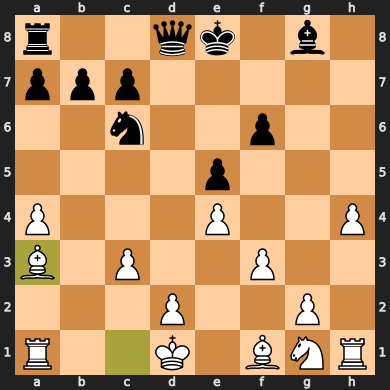

1.01545081967015
[Move.from_uci('d1e2'), Move.from_uci('d1e1'), Move.from_uci('d1c1')]


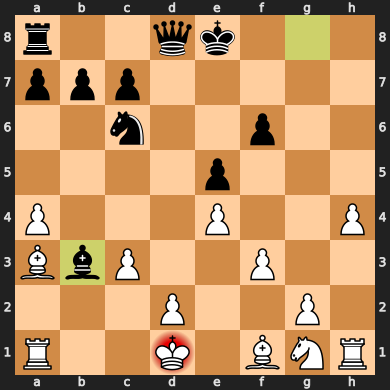

1.0404508196697861
[Move.from_uci('b3a4'), Move.from_uci('d8d2'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('d8d4'), Move.from_uci('d8d3'), Move.from_uci('c6d4'), Move.from_uci('b3d5'), Move.from_uci('e8d7'), Move.from_uci('d8e7'), Move.from_uci('d8d7'), Move.from_uci('a8c8'), Move.from_uci('b3e6'), Move.from_uci('b3c4'), Move.from_uci('e8f7'), Move.from_uci('a8b8'), Move.from_uci('b3f7'), Move.from_uci('b3c2'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('c6e7'), Move.from_uci('c6b4'), Move.from_uci('b3g8'), Move.from_uci('b3a2'), Move.from_uci('b3d1'), Move.from_uci('c6b8'), Move.from_uci('c6a5'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('b7b5'), Move.from_uci('a7a6'), Move.from_uci('b7b6')]


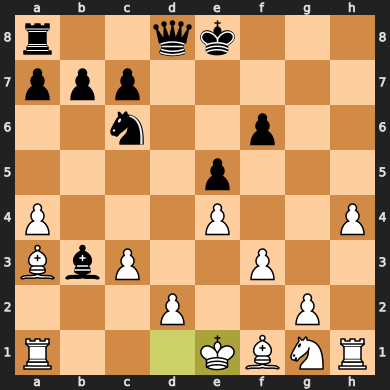

0.12262295081745833
[Move.from_uci('f3f4'), Move.from_uci('a3c5'), Move.from_uci('g1e2'), Move.from_uci('f1b5'), Move.from_uci('f1c4'), Move.from_uci('a3d6'), Move.from_uci('a3b2'), Move.from_uci('f1d3'), Move.from_uci('f1e2'), Move.from_uci('a1d1'), Move.from_uci('e1e2'), Move.from_uci('a3e7'), Move.from_uci('a3b4'), Move.from_uci('a1c1'), Move.from_uci('e1f2'), Move.from_uci('a1b1'), Move.from_uci('g1h3'), Move.from_uci('f1a6'), Move.from_uci('a3f8'), Move.from_uci('a3c1'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('a1a2'), Move.from_uci('d2d4'), Move.from_uci('c3c4'), Move.from_uci('d2d3'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


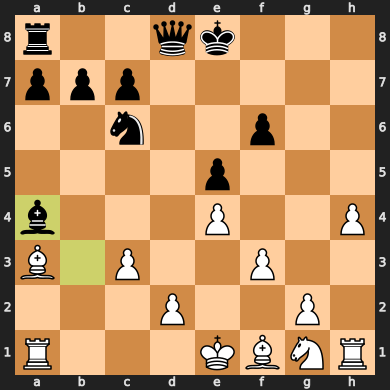

0.4226229508185497
[Move.from_uci('c6d4'), Move.from_uci('d8d2'), Move.from_uci('b7b5'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('d8d4'), Move.from_uci('d8d3'), Move.from_uci('a4b5'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('e8d7'), Move.from_uci('d8e7'), Move.from_uci('d8d7'), Move.from_uci('a8c8'), Move.from_uci('a8b8'), Move.from_uci('a4d1'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('c6e7'), Move.from_uci('c6b4'), Move.from_uci('c6b8'), Move.from_uci('c6a5'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('a7a6'), Move.from_uci('b7b6')]


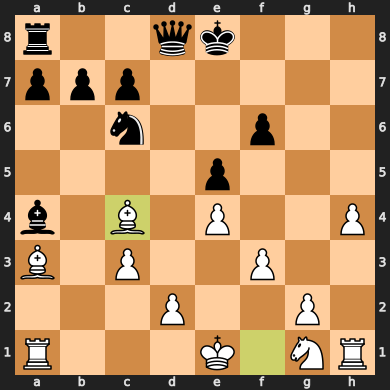

0.17762295081774937
[Move.from_uci('c3d4'), Move.from_uci('c4b5'), Move.from_uci('c4f7'), Move.from_uci('g1e2'), Move.from_uci('a3d6'), Move.from_uci('a3b2'), Move.from_uci('a3c5'), Move.from_uci('a1d1'), Move.from_uci('c4b3'), Move.from_uci('a3e7'), Move.from_uci('a3b4'), Move.from_uci('a1c1'), Move.from_uci('e1f2'), Move.from_uci('a1b1'), Move.from_uci('c4e6'), Move.from_uci('c4d5'), Move.from_uci('g1h3'), Move.from_uci('e1f1'), Move.from_uci('c4d3'), Move.from_uci('c4e2'), Move.from_uci('a3f8'), Move.from_uci('a3c1'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('a1a2'), Move.from_uci('c4a2'), Move.from_uci('c4g8'), Move.from_uci('c4a6'), Move.from_uci('c4f1'), Move.from_uci('f3f4'), Move.from_uci('d2d3'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


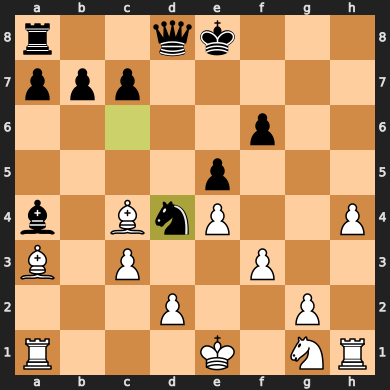

3.7545491803248296
[Move.from_uci('d8d4'), Move.from_uci('e5d4'), Move.from_uci('b7b5'), Move.from_uci('a4c6'), Move.from_uci('a4d7'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('a4b5'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('e8d7'), Move.from_uci('d8e7'), Move.from_uci('d8d7'), Move.from_uci('a8c8'), Move.from_uci('a8b8'), Move.from_uci('a4d1'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


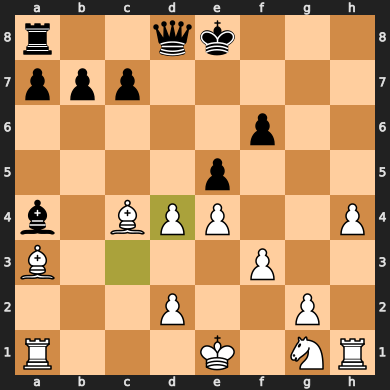

2.202745901637172
[Move.from_uci('a3b2'), Move.from_uci('c4b5'), Move.from_uci('c4f7'), Move.from_uci('g1e2'), Move.from_uci('a3c5'), Move.from_uci('d2d3'), Move.from_uci('a1c1'), Move.from_uci('a3d6'), Move.from_uci('e1e2'), Move.from_uci('a1d1'), Move.from_uci('c4b3'), Move.from_uci('a3e7'), Move.from_uci('a3b4'), Move.from_uci('a1b1'), Move.from_uci('c4e6'), Move.from_uci('c4d5'), Move.from_uci('g1h3'), Move.from_uci('e1f1'), Move.from_uci('c4d3'), Move.from_uci('c4e2'), Move.from_uci('a3f8'), Move.from_uci('a3c1'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('a1a2'), Move.from_uci('c4a2'), Move.from_uci('c4g8'), Move.from_uci('c4a6'), Move.from_uci('c4f1'), Move.from_uci('f3f4'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


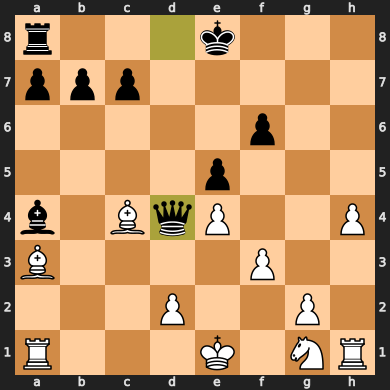

2.2527459016382636
[Move.from_uci('a8d8'), Move.from_uci('d4e4'), Move.from_uci('d4e3'), Move.from_uci('d4f2'), Move.from_uci('d4d2'), Move.from_uci('d4g1'), Move.from_uci('b7b5'), Move.from_uci('d4c4'), Move.from_uci('e8c8'), Move.from_uci('a4c6'), Move.from_uci('a4d7'), Move.from_uci('a4b5'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('e8d7'), Move.from_uci('a8c8'), Move.from_uci('a8b8'), Move.from_uci('e8d8'), Move.from_uci('d4d6'), Move.from_uci('d4d5'), Move.from_uci('d4c5'), Move.from_uci('d4d3'), Move.from_uci('d4c3'), Move.from_uci('a4d1'), Move.from_uci('d4d7'), Move.from_uci('d4b6'), Move.from_uci('d4b2'), Move.from_uci('d4d8'), Move.from_uci('d4a1'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


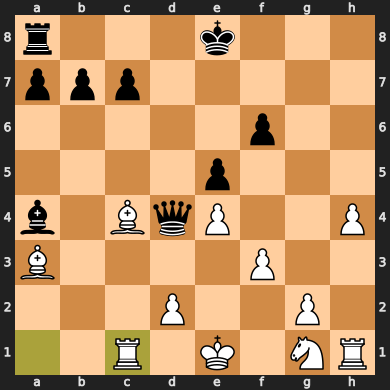

2.0604508196720417
[Move.from_uci('c4b5'), Move.from_uci('c4f7'), Move.from_uci('g1e2'), Move.from_uci('a3b2'), Move.from_uci('a3c5'), Move.from_uci('a3e7'), Move.from_uci('a3d6'), Move.from_uci('e1e2'), Move.from_uci('c4b3'), Move.from_uci('a3b4'), Move.from_uci('c1d1'), Move.from_uci('c4e6'), Move.from_uci('c4d5'), Move.from_uci('g1h3'), Move.from_uci('e1f1'), Move.from_uci('c1b1'), Move.from_uci('c4d3'), Move.from_uci('c4e2'), Move.from_uci('a3f8'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('c1c3'), Move.from_uci('c1c2'), Move.from_uci('c1a1'), Move.from_uci('c4a2'), Move.from_uci('c4g8'), Move.from_uci('c4a6'), Move.from_uci('c4f1'), Move.from_uci('f3f4'), Move.from_uci('d2d3'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


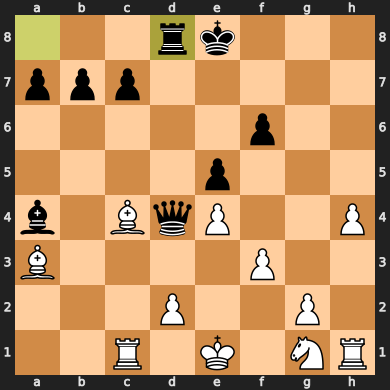

2.1354508196709503
[Move.from_uci('d4b2'), Move.from_uci('d4e4'), Move.from_uci('d4e3'), Move.from_uci('d4f2'), Move.from_uci('d4d2'), Move.from_uci('d4g1'), Move.from_uci('c7c5'), Move.from_uci('b7b5'), Move.from_uci('d4d7'), Move.from_uci('d4c4'), Move.from_uci('a4c6'), Move.from_uci('a4d7'), Move.from_uci('a4b5'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('e8d7'), Move.from_uci('d4d6'), Move.from_uci('d4d5'), Move.from_uci('d4c5'), Move.from_uci('d4d3'), Move.from_uci('d4c3'), Move.from_uci('a4d1'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('d4b6'), Move.from_uci('d8a8'), Move.from_uci('d8d7'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('d4a1'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


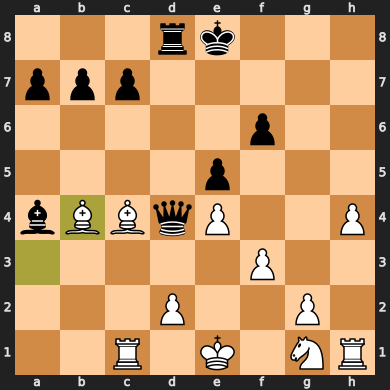

2.1854508196702227
[Move.from_uci('c4f7'), Move.from_uci('c4b5'), Move.from_uci('b4c3'), Move.from_uci('b4e7'), Move.from_uci('g1e2'), Move.from_uci('c1b1'), Move.from_uci('b4a3'), Move.from_uci('b4d6'), Move.from_uci('e1e2'), Move.from_uci('c4b3'), Move.from_uci('b4c5'), Move.from_uci('e1f2'), Move.from_uci('c1d1'), Move.from_uci('c4e6'), Move.from_uci('c4d5'), Move.from_uci('g1h3'), Move.from_uci('e1f1'), Move.from_uci('c4d3'), Move.from_uci('c4e2'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('c1c3'), Move.from_uci('c1c2'), Move.from_uci('c1a1'), Move.from_uci('b4f8'), Move.from_uci('b4a5'), Move.from_uci('c4a2'), Move.from_uci('c4g8'), Move.from_uci('c4a6'), Move.from_uci('c4f1'), Move.from_uci('d2d4'), Move.from_uci('f3f4'), Move.from_uci('d2d3'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


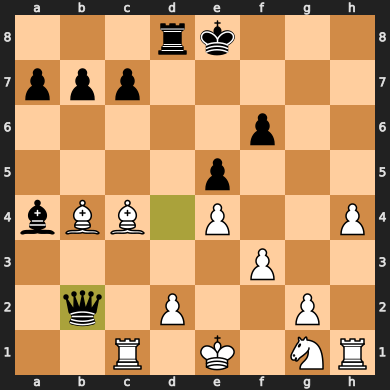

2.4354508196684037
[Move.from_uci('b2b4'), Move.from_uci('b2d2'), Move.from_uci('b2c1'), Move.from_uci('b7b5'), Move.from_uci('d8d2'), Move.from_uci('a4c6'), Move.from_uci('a4d7'), Move.from_uci('a4b5'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('e8d7'), Move.from_uci('b2d4'), Move.from_uci('b2c3'), Move.from_uci('a4d1'), Move.from_uci('b2b3'), Move.from_uci('b2c2'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('d8a8'), Move.from_uci('d8d7'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('d8d4'), Move.from_uci('d8d3'), Move.from_uci('b2a3'), Move.from_uci('b2a2'), Move.from_uci('b2b1'), Move.from_uci('b2a1'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


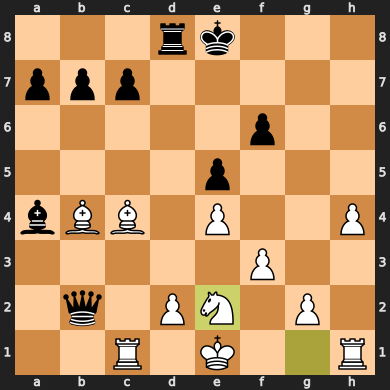

-0.9837295081979391
[Move.from_uci('c4d5'), Move.from_uci('c4b5'), Move.from_uci('c4f7'), Move.from_uci('c1b1'), Move.from_uci('e2d4'), Move.from_uci('e2f4'), Move.from_uci('c4b3'), Move.from_uci('e2c3'), Move.from_uci('h1f1'), Move.from_uci('e1f2'), Move.from_uci('h1g1'), Move.from_uci('c1d1'), Move.from_uci('c4e6'), Move.from_uci('e2g3'), Move.from_uci('e1f1'), Move.from_uci('c4d3'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('c1c3'), Move.from_uci('c1c2'), Move.from_uci('c1a1'), Move.from_uci('c4a2'), Move.from_uci('c4g8'), Move.from_uci('c4a6'), Move.from_uci('e2g1'), Move.from_uci('f3f4'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


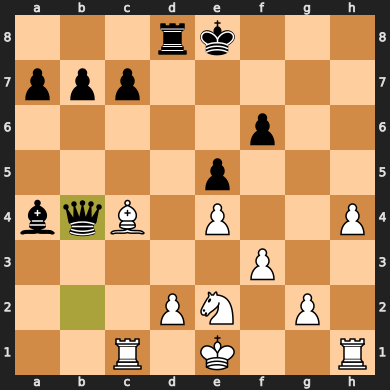

-0.6486475409838022
[Move.from_uci('b4d2'), Move.from_uci('b4c5'), Move.from_uci('b4b6'), Move.from_uci('d8d2'), Move.from_uci('b7b5'), Move.from_uci('b4b2'), Move.from_uci('b4a3'), Move.from_uci('b4c4'), Move.from_uci('a4c6'), Move.from_uci('a4d7'), Move.from_uci('a4b5'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('b4d6'), Move.from_uci('b4c3'), Move.from_uci('b4e7'), Move.from_uci('b4b5'), Move.from_uci('b4b3'), Move.from_uci('a4d1'), Move.from_uci('e8f8'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('b4a5'), Move.from_uci('d8a8'), Move.from_uci('d8d7'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('d8d4'), Move.from_uci('d8d3'), Move.from_uci('b4f8'), Move.from_uci('b4b1'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


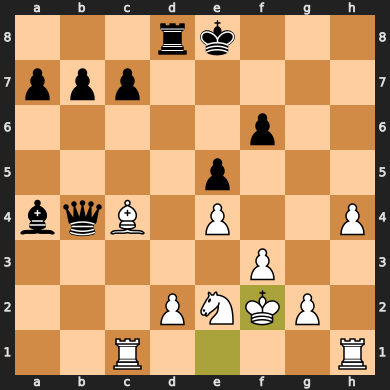

-1.7980327868845052
[Move.from_uci('c1b1'), Move.from_uci('c4b5'), Move.from_uci('c4f7'), Move.from_uci('h1e1'), Move.from_uci('h1d1'), Move.from_uci('f2g1'), Move.from_uci('c4b3'), Move.from_uci('h1f1'), Move.from_uci('h1g1'), Move.from_uci('c1e1'), Move.from_uci('c1d1'), Move.from_uci('c4e6'), Move.from_uci('c4d5'), Move.from_uci('c1f1'), Move.from_uci('c1g1'), Move.from_uci('c4d3'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('c1c3'), Move.from_uci('c1c2'), Move.from_uci('c1a1'), Move.from_uci('f2f1'), Move.from_uci('f2g3'), Move.from_uci('c4a2'), Move.from_uci('c4g8'), Move.from_uci('c4a6'), Move.from_uci('f3f4'), Move.from_uci('h4h5'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


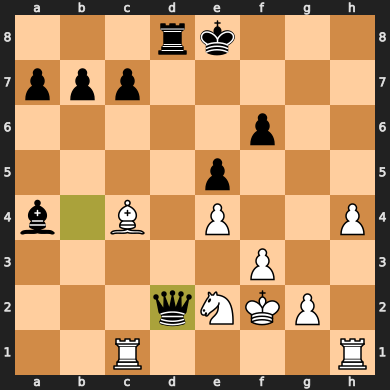

-1.7529508196712413
[Move.from_uci('d2d6'), Move.from_uci('d2d4'), Move.from_uci('d2e3'), Move.from_uci('d2e2'), Move.from_uci('d2e1'), Move.from_uci('b7b5'), Move.from_uci('d2f4'), Move.from_uci('d2g5'), Move.from_uci('d2b2'), Move.from_uci('d2h6'), Move.from_uci('d2c1'), Move.from_uci('a4c6'), Move.from_uci('a4d7'), Move.from_uci('a4b5'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('d2d5'), Move.from_uci('d2d3'), Move.from_uci('d2c3'), Move.from_uci('a4d1'), Move.from_uci('d2d7'), Move.from_uci('d2b4'), Move.from_uci('d2c2'), Move.from_uci('e8f8'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('d2a5'), Move.from_uci('d2d1'), Move.from_uci('d8a8'), Move.from_uci('d8d7'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('d8d4'), Move.from_uci('d8d3'), Move.from_uci('d2a2'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci

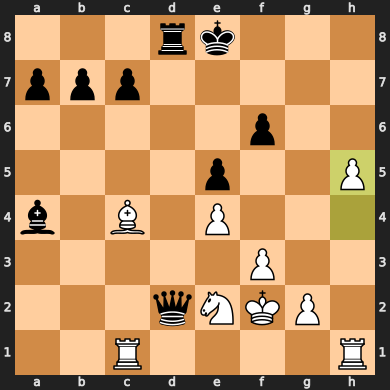

-1.8029508196705137
[Move.from_uci('f3f4'), Move.from_uci('c4b5'), Move.from_uci('c4f7'), Move.from_uci('e2d4'), Move.from_uci('e2f4'), Move.from_uci('h1e1'), Move.from_uci('h1d1'), Move.from_uci('f2e3'), Move.from_uci('f2g1'), Move.from_uci('c4b3'), Move.from_uci('e2c3'), Move.from_uci('h1f1'), Move.from_uci('h1g1'), Move.from_uci('c1e1'), Move.from_uci('c1d1'), Move.from_uci('c4e6'), Move.from_uci('c4d5'), Move.from_uci('e2g3'), Move.from_uci('c1f1'), Move.from_uci('c1g1'), Move.from_uci('c1b1'), Move.from_uci('f2e1'), Move.from_uci('c4d3'), Move.from_uci('h1h4'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('c1c3'), Move.from_uci('c1c2'), Move.from_uci('c1a1'), Move.from_uci('f2f1'), Move.from_uci('f2g3'), Move.from_uci('c4a2'), Move.from_uci('c4g8'), Move.from_uci('c4a6'), Move.from_uci('e2g1'), Move.from_uci('h5h6'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


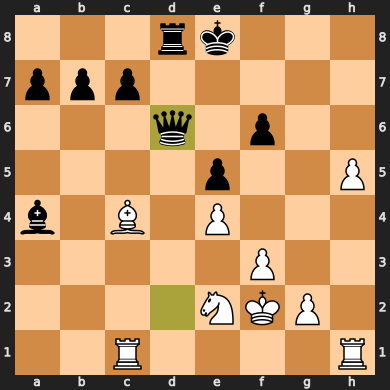

-1.70295081967015
[Move.from_uci('d6c5'), Move.from_uci('d6d4'), Move.from_uci('d6b6'), Move.from_uci('b7b5'), Move.from_uci('a4d1'), Move.from_uci('d6d2'), Move.from_uci('d6a3'), Move.from_uci('a4c6'), Move.from_uci('a4d7'), Move.from_uci('a4b5'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('d6e6'), Move.from_uci('d6c6'), Move.from_uci('d6d5'), Move.from_uci('d6d3'), Move.from_uci('e8f8'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('d6e7'), Move.from_uci('d6d7'), Move.from_uci('d6b4'), Move.from_uci('d8a8'), Move.from_uci('d8d7'), Move.from_uci('d6d1'), Move.from_uci('d6f8'), Move.from_uci('d6a6'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


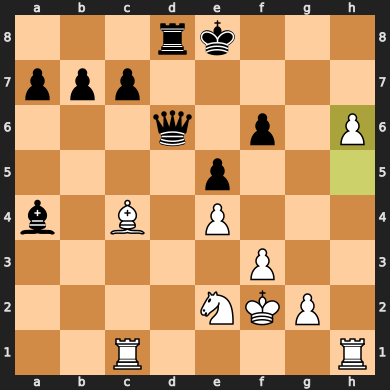

-1.70295081967015
[Move.from_uci('f2g3'), Move.from_uci('f2e1'), Move.from_uci('f2f1'), Move.from_uci('e2d4')]


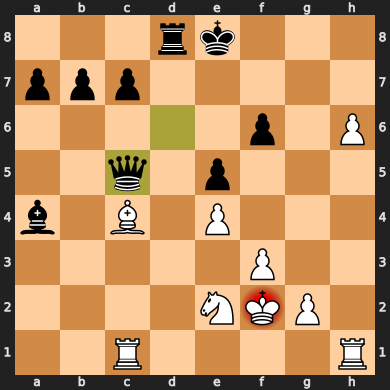

-2.055655737704001
[Move.from_uci('d8d1'), Move.from_uci('c5f2'), Move.from_uci('c5g1'), Move.from_uci('b7b5'), Move.from_uci('a4d1'), Move.from_uci('d8d2'), Move.from_uci('c5e3'), Move.from_uci('c5c4'), Move.from_uci('a4c6'), Move.from_uci('a4d7'), Move.from_uci('a4b5'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('c5d6'), Move.from_uci('c5c6'), Move.from_uci('c5d5'), Move.from_uci('c5d4'), Move.from_uci('e8f8'), Move.from_uci('d8c8'), Move.from_uci('d8b8'), Move.from_uci('c5e7'), Move.from_uci('c5b6'), Move.from_uci('c5b5'), Move.from_uci('c5b4'), Move.from_uci('d8a8'), Move.from_uci('d8d7'), Move.from_uci('d8d6'), Move.from_uci('d8d5'), Move.from_uci('d8d4'), Move.from_uci('d8d3'), Move.from_uci('c5a5'), Move.from_uci('c5f8'), Move.from_uci('c5a3'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


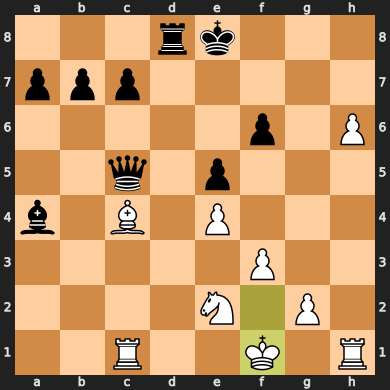

-1.8682786885237874
[Move.from_uci('c1d1')]


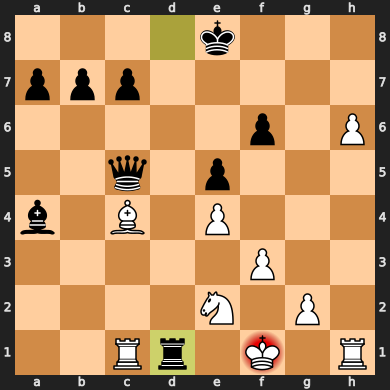

3.0838524590126326
[Move.from_uci('a4d1'), Move.from_uci('c5f2'), Move.from_uci('c5g1'), Move.from_uci('c5c4'), Move.from_uci('a4b3'), Move.from_uci('a4c2'), Move.from_uci('b7b5'), Move.from_uci('c5e3'), Move.from_uci('a4c6'), Move.from_uci('a4d7'), Move.from_uci('e8e7'), Move.from_uci('a4b5'), Move.from_uci('c5d6'), Move.from_uci('c5c6'), Move.from_uci('c5d5'), Move.from_uci('c5d4'), Move.from_uci('e8f8'), Move.from_uci('c5e7'), Move.from_uci('c5b6'), Move.from_uci('c5b5'), Move.from_uci('c5b4'), Move.from_uci('c5a5'), Move.from_uci('c5f8'), Move.from_uci('c5a3'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


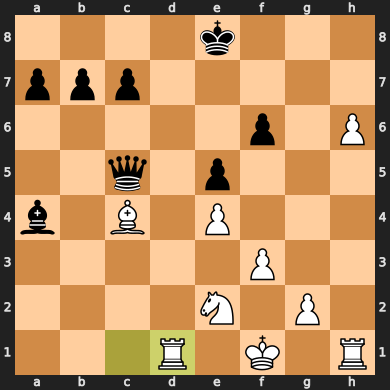

-2.056803278686857
[Move.from_uci('f3f4'), Move.from_uci('c4b5'), Move.from_uci('c4f7'), Move.from_uci('h1h5'), Move.from_uci('e2d4'), Move.from_uci('e2f4'), Move.from_uci('c4b3'), Move.from_uci('e2c3'), Move.from_uci('f1e1'), Move.from_uci('h1g1'), Move.from_uci('c4e6'), Move.from_uci('c4d5'), Move.from_uci('e2g3'), Move.from_uci('c4d3'), Move.from_uci('h1h4'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('c4a2'), Move.from_uci('c4g8'), Move.from_uci('c4a6'), Move.from_uci('e2g1'), Move.from_uci('e2c1'), Move.from_uci('h6h7'), Move.from_uci('g2g4'), Move.from_uci('g2g3')]


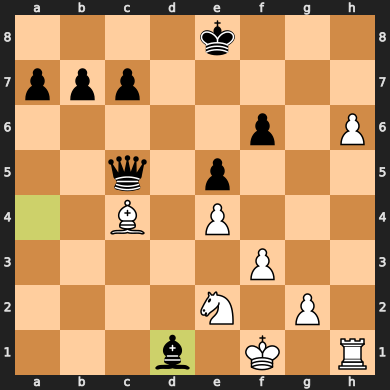

-1.726065573770029
[Move.from_uci('d1e2'), Move.from_uci('c5f2'), Move.from_uci('c5g1'), Move.from_uci('c5c4'), Move.from_uci('b7b5'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('d1b3'), Move.from_uci('d1c2'), Move.from_uci('e8d8'), Move.from_uci('c5d6'), Move.from_uci('c5c6'), Move.from_uci('c5d5'), Move.from_uci('c5d4'), Move.from_uci('c5e3'), Move.from_uci('d1a4'), Move.from_uci('e8f8'), Move.from_uci('c5e7'), Move.from_uci('c5b6'), Move.from_uci('c5b5'), Move.from_uci('c5b4'), Move.from_uci('c5a5'), Move.from_uci('c5f8'), Move.from_uci('c5a3'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


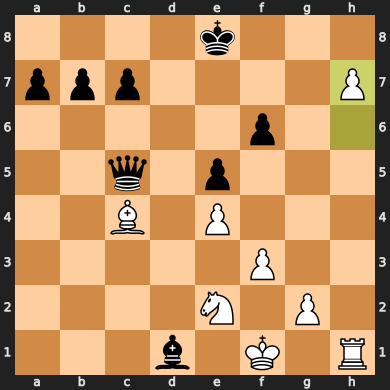

-4.950655737702618
[Move.from_uci('f1e1'), Move.from_uci('f1e2'), Move.from_uci('c4e2')]


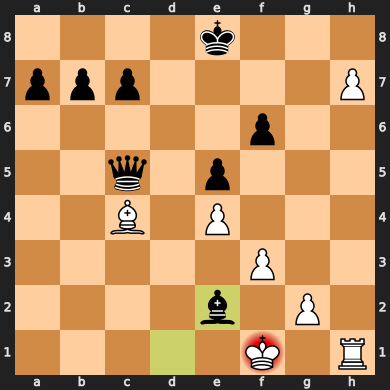

-1.662131147539185
[Move.from_uci('c5c4'), Move.from_uci('c5e3'), Move.from_uci('c5f2'), Move.from_uci('b7b5'), Move.from_uci('c5a3'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('e8d8'), Move.from_uci('c5d6'), Move.from_uci('c5c6'), Move.from_uci('c5d5'), Move.from_uci('c5d4'), Move.from_uci('c5e7'), Move.from_uci('c5b6'), Move.from_uci('c5b5'), Move.from_uci('c5b4'), Move.from_uci('e8f8'), Move.from_uci('c5a5'), Move.from_uci('c5f8'), Move.from_uci('c5g1'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


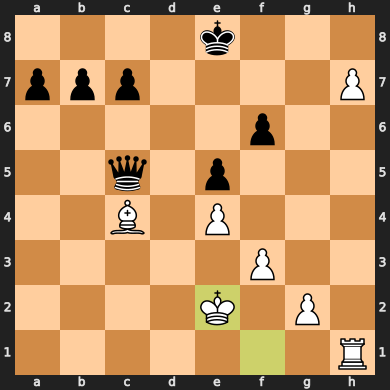

-5.0252459016392095
[Move.from_uci('e2e3'), Move.from_uci('e2d2'), Move.from_uci('e2f2'), Move.from_uci('e2e1'), Move.from_uci('e2d1')]


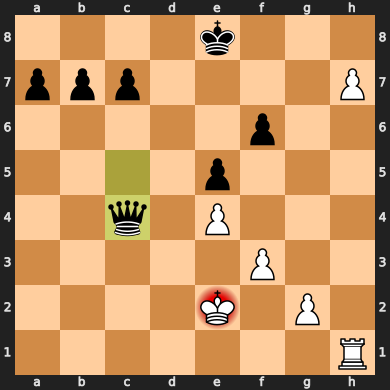

-5.0465573770488845
[Move.from_uci('c4d4'), Move.from_uci('c4c5'), Move.from_uci('c4e2'), Move.from_uci('c4c2'), Move.from_uci('c4a2'), Move.from_uci('c4f1'), Move.from_uci('c4d3'), Move.from_uci('c4c3'), Move.from_uci('c4b3'), Move.from_uci('c4e4'), Move.from_uci('e8e7'), Move.from_uci('e8d7'), Move.from_uci('e8f7'), Move.from_uci('e8d8'), Move.from_uci('c4f7'), Move.from_uci('c4e6'), Move.from_uci('c4c6'), Move.from_uci('c4d5'), Move.from_uci('c4b5'), Move.from_uci('c4b4'), Move.from_uci('e8f8'), Move.from_uci('c4a4'), Move.from_uci('c4g8'), Move.from_uci('c4a6'), Move.from_uci('c4c1'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('b7b5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


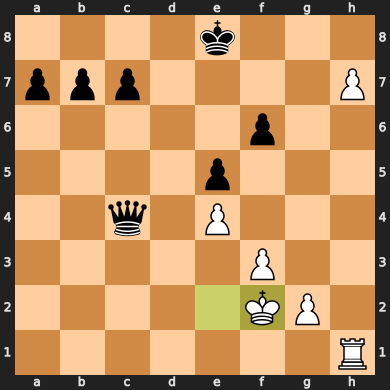

-5.0465573770488845
[Move.from_uci('f2g3'), Move.from_uci('f2e2'), Move.from_uci('f2e1'), Move.from_uci('f2f1')]


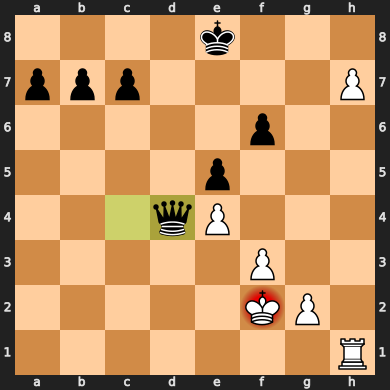

-5.032622950819132
[Move.from_uci('e8e7'), Move.from_uci('d4f2'), Move.from_uci('d4e3'), Move.from_uci('d4d3'), Move.from_uci('d4c3'), Move.from_uci('d4e4'), Move.from_uci('e8d7'), Move.from_uci('e8f7'), Move.from_uci('e8d8'), Move.from_uci('d4d6'), Move.from_uci('d4d5'), Move.from_uci('d4c5'), Move.from_uci('d4c4'), Move.from_uci('d4d7'), Move.from_uci('d4b6'), Move.from_uci('d4b4'), Move.from_uci('d4d2'), Move.from_uci('d4b2'), Move.from_uci('e8f8'), Move.from_uci('d4d8'), Move.from_uci('d4a4'), Move.from_uci('d4d1'), Move.from_uci('d4g1'), Move.from_uci('d4a1'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('b7b5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


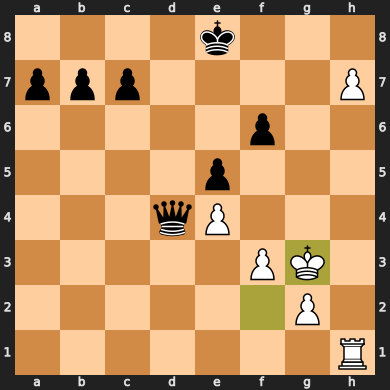

-5.225245901638518
[Move.from_uci('h7h8q'), Move.from_uci('f3f4'), Move.from_uci('h1d1'), Move.from_uci('h1h5'), Move.from_uci('h1e1'), Move.from_uci('h1f1'), Move.from_uci('h1c1'), Move.from_uci('h1g1'), Move.from_uci('h1b1'), Move.from_uci('h1a1'), Move.from_uci('g3g4'), Move.from_uci('h1h6'), Move.from_uci('h1h4'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('g3h2'), Move.from_uci('g3h3'), Move.from_uci('g3h4'), Move.from_uci('h7h8r'), Move.from_uci('h7h8b'), Move.from_uci('h7h8n')]


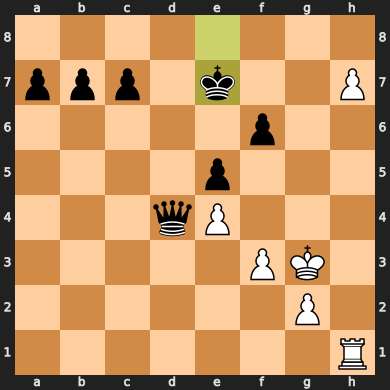

1.8112295081980854
[Move.from_uci('d4e3'), Move.from_uci('d4f2'), Move.from_uci('d4d3'), Move.from_uci('d4c3'), Move.from_uci('d4e4'), Move.from_uci('e7e6'), Move.from_uci('e7d6'), Move.from_uci('e7d7'), Move.from_uci('d4d6'), Move.from_uci('d4d5'), Move.from_uci('d4c5'), Move.from_uci('d4c4'), Move.from_uci('d4d7'), Move.from_uci('d4b6'), Move.from_uci('d4b4'), Move.from_uci('d4d2'), Move.from_uci('d4b2'), Move.from_uci('e7f7'), Move.from_uci('d4d8'), Move.from_uci('d4a4'), Move.from_uci('d4d1'), Move.from_uci('d4g1'), Move.from_uci('d4a1'), Move.from_uci('f6f5'), Move.from_uci('a7a5'), Move.from_uci('c7c5'), Move.from_uci('b7b5'), Move.from_uci('a7a6'), Move.from_uci('b7b6'), Move.from_uci('c7c6')]


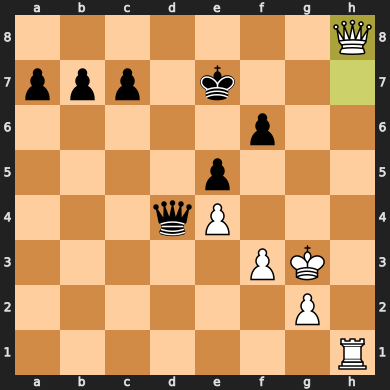

1.8112295081980854
[Move.from_uci('h8h7'), Move.from_uci('h8f6'), Move.from_uci('h8g7'), Move.from_uci('h8e8'), Move.from_uci('h8d8'), Move.from_uci('h8f8'), Move.from_uci('h1h7'), Move.from_uci('h1e1'), Move.from_uci('h8h5'), Move.from_uci('h8h4'), Move.from_uci('h8g8'), Move.from_uci('h8c8'), Move.from_uci('h8b8'), Move.from_uci('h8h6'), Move.from_uci('h8h3'), Move.from_uci('h8h2'), Move.from_uci('h1d1'), Move.from_uci('h1f1'), Move.from_uci('h1c1'), Move.from_uci('g3h2'), Move.from_uci('h1g1'), Move.from_uci('h1b1'), Move.from_uci('h8a8'), Move.from_uci('h1a1'), Move.from_uci('g3g4'), Move.from_uci('h1h6'), Move.from_uci('h1h5'), Move.from_uci('h1h4'), Move.from_uci('h1h3'), Move.from_uci('h1h2'), Move.from_uci('g3h3'), Move.from_uci('g3h4')]


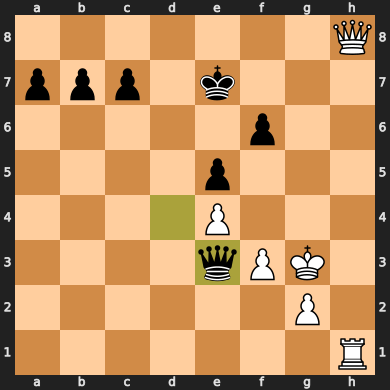

1.787459016393405
[Move.from_uci('e7e6'), Move.from_uci('e7d6')]


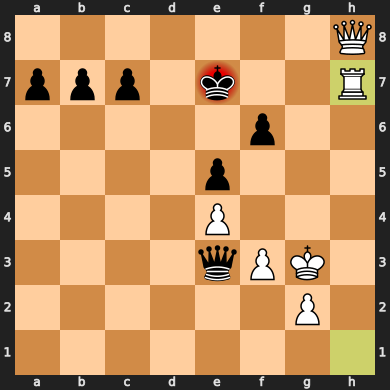

1.6833606557368688
[Move.from_uci('h8e8'), Move.from_uci('h8f6'), Move.from_uci('h8g8'), Move.from_uci('h8c8'), Move.from_uci('h7e7'), Move.from_uci('h7c7'), Move.from_uci('h7h5'), Move.from_uci('h8g7'), Move.from_uci('h8d8'), Move.from_uci('h8f8'), Move.from_uci('h8b8'), Move.from_uci('h7g7'), Move.from_uci('h7f7'), Move.from_uci('h7d7'), Move.from_uci('g3h2'), Move.from_uci('h8a8'), Move.from_uci('g3g4'), Move.from_uci('h7h1'), Move.from_uci('h7h6'), Move.from_uci('h7h4'), Move.from_uci('h7h3'), Move.from_uci('h7h2'), Move.from_uci('g3h3'), Move.from_uci('g3h4')]


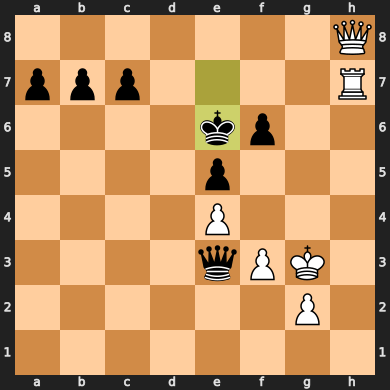

1.8333606557368674
[Move.from_uci('e6d6')]


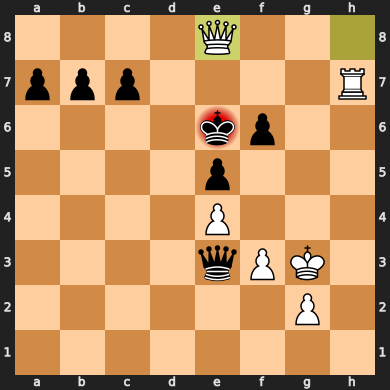

1.8333606557368674
[Move.from_uci('e8d7'), Move.from_uci('e8e6'), Move.from_uci('e8c6'), Move.from_uci('e8e5'), Move.from_uci('e8e7'), Move.from_uci('h7d7'), Move.from_uci('e8d8'), Move.from_uci('e8f8'), Move.from_uci('h7e7'), Move.from_uci('e8b5'), Move.from_uci('e8h5'), Move.from_uci('h7c7'), Move.from_uci('e8f7'), Move.from_uci('e8g6'), Move.from_uci('e8a4'), Move.from_uci('h7g7'), Move.from_uci('h7f7'), Move.from_uci('g3h2'), Move.from_uci('g3g4'), Move.from_uci('e8g8'), Move.from_uci('e8c8'), Move.from_uci('e8b8'), Move.from_uci('h7h8'), Move.from_uci('h7h1'), Move.from_uci('h7h6'), Move.from_uci('h7h5'), Move.from_uci('h7h4'), Move.from_uci('h7h3'), Move.from_uci('h7h2'), Move.from_uci('g3h3'), Move.from_uci('e8h8'), Move.from_uci('e8a8'), Move.from_uci('g3h4')]


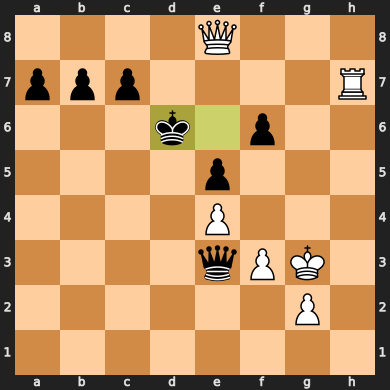

1.883360655736868
[Move.from_uci('d6c5')]


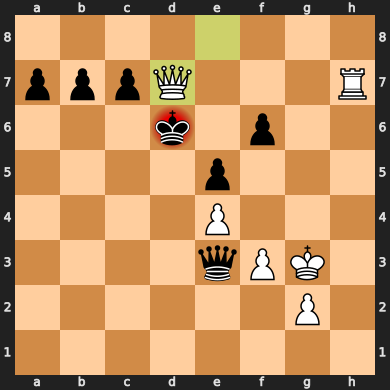

2.0325409836056467
[Move.from_uci('d7c7'), Move.from_uci('d7d6'), Move.from_uci('d7c6'), Move.from_uci('d7d5'), Move.from_uci('d7d4'), Move.from_uci('d7e7'), Move.from_uci('d7b5'), Move.from_uci('h7g7'), Move.from_uci('h7f7'), Move.from_uci('h7e7'), Move.from_uci('d7e6'), Move.from_uci('d7f5'), Move.from_uci('d7d3'), Move.from_uci('g3h2'), Move.from_uci('d7g7'), Move.from_uci('d7f7'), Move.from_uci('d7g4'), Move.from_uci('d7a4'), Move.from_uci('d7d2'), Move.from_uci('g3g4'), Move.from_uci('h7h8'), Move.from_uci('h7h1'), Move.from_uci('d7e8'), Move.from_uci('d7d8'), Move.from_uci('d7d1'), Move.from_uci('h7h6'), Move.from_uci('h7h5'), Move.from_uci('h7h4'), Move.from_uci('h7h3'), Move.from_uci('h7h2'), Move.from_uci('d7c8'), Move.from_uci('d7h3'), Move.from_uci('g3h3'), Move.from_uci('g3h4')]


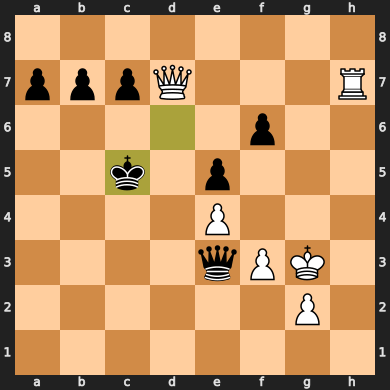

3.393934426228598
[Move.from_uci('c5b5'), Move.from_uci('c5d4'), Move.from_uci('c5b4')]


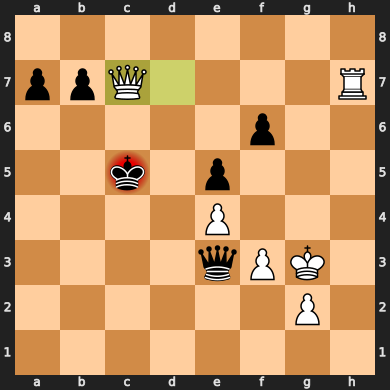

3.546393442620329
[Move.from_uci('c7b7'), Move.from_uci('c7c6'), Move.from_uci('c7e5'), Move.from_uci('c7c5'), Move.from_uci('c7c4'), Move.from_uci('c7d7'), Move.from_uci('c7b6'), Move.from_uci('c7a5'), Move.from_uci('h7g7'), Move.from_uci('h7f7'), Move.from_uci('h7e7'), Move.from_uci('h7d7'), Move.from_uci('c7d6'), Move.from_uci('c7c3'), Move.from_uci('c7c2'), Move.from_uci('g3h2'), Move.from_uci('c7g7'), Move.from_uci('c7f7'), Move.from_uci('c7e7'), Move.from_uci('g3g4'), Move.from_uci('h7h8'), Move.from_uci('h7h1'), Move.from_uci('c7d8'), Move.from_uci('h7h6'), Move.from_uci('h7h5'), Move.from_uci('h7h4'), Move.from_uci('h7h3'), Move.from_uci('h7h2'), Move.from_uci('c7c8'), Move.from_uci('c7b8'), Move.from_uci('c7c1'), Move.from_uci('g3h3'), Move.from_uci('g3h4')]


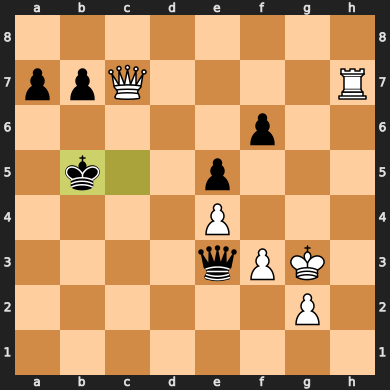

5.107786885243281
[Move.from_uci('b5c5'), Move.from_uci('b5c4'), Move.from_uci('e3b6'), Move.from_uci('b5a5'), Move.from_uci('b5a4')]


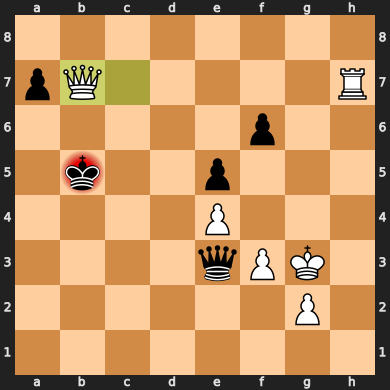

4.95532786885155
[Move.from_uci('h7c7'), Move.from_uci('b7c6'), Move.from_uci('b7d5'), Move.from_uci('b7e7'), Move.from_uci('b7c7'), Move.from_uci('b7b6'), Move.from_uci('b7b5'), Move.from_uci('b7b4'), Move.from_uci('b7c8'), Move.from_uci('b7a7'), Move.from_uci('h7g7'), Move.from_uci('h7f7'), Move.from_uci('h7e7'), Move.from_uci('h7d7'), Move.from_uci('g3h2'), Move.from_uci('b7b3'), Move.from_uci('g3g4'), Move.from_uci('h7h8'), Move.from_uci('h7h1'), Move.from_uci('b7g7'), Move.from_uci('b7f7'), Move.from_uci('b7d7'), Move.from_uci('b7b2'), Move.from_uci('h7h6'), Move.from_uci('h7h5'), Move.from_uci('h7h4'), Move.from_uci('h7h3'), Move.from_uci('h7h2'), Move.from_uci('g3h3'), Move.from_uci('b7b8'), Move.from_uci('b7a6'), Move.from_uci('b7b1'), Move.from_uci('g3h4'), Move.from_uci('b7a8')]


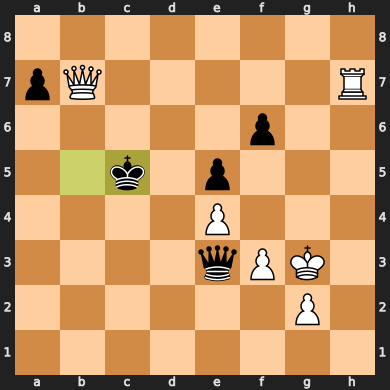

5.9721311475400745
[Move.from_uci('c5d6'), Move.from_uci('c5c6'), Move.from_uci('c5c4'), Move.from_uci('c5b5'), Move.from_uci('c5b4')]


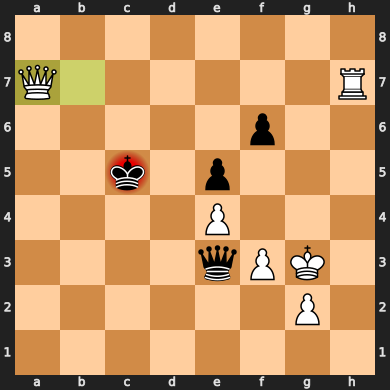

5.872950819670568
[Move.from_uci('a7e3'), Move.from_uci('a7c5'), Move.from_uci('a7d4'), Move.from_uci('a7e7'), Move.from_uci('a7d7'), Move.from_uci('a7c7'), Move.from_uci('a7b6'), Move.from_uci('h7d7'), Move.from_uci('a7b8'), Move.from_uci('a7a6'), Move.from_uci('a7a3'), Move.from_uci('h7e7'), Move.from_uci('a7a5'), Move.from_uci('h7h5'), Move.from_uci('a7a1'), Move.from_uci('a7b7'), Move.from_uci('a7g7'), Move.from_uci('a7f7'), Move.from_uci('a7a4'), Move.from_uci('h7g7'), Move.from_uci('h7f7'), Move.from_uci('h7c7'), Move.from_uci('h7b7'), Move.from_uci('g3h2'), Move.from_uci('a7a2'), Move.from_uci('g3g4'), Move.from_uci('h7h8'), Move.from_uci('h7h1'), Move.from_uci('h7h6'), Move.from_uci('h7h4'), Move.from_uci('h7h3'), Move.from_uci('h7h2'), Move.from_uci('a7a8'), Move.from_uci('g3h3'), Move.from_uci('g3h4')]


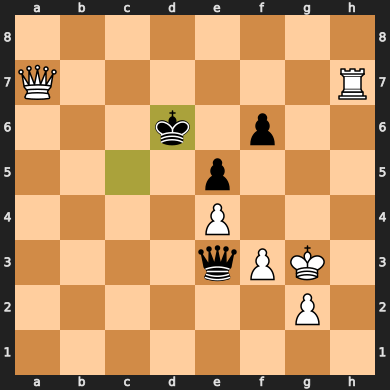

15.021721311475133
[Move.from_uci('d6c6'), Move.from_uci('d6e6'), Move.from_uci('f6f5')]


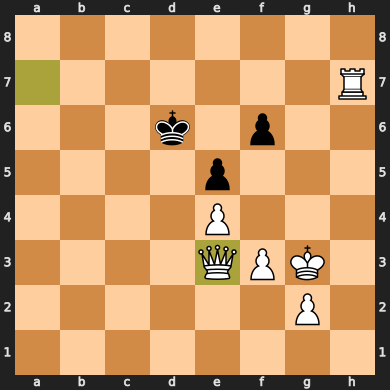

15.143032786885172
[Move.from_uci('h7h6'), Move.from_uci('h7c7'), Move.from_uci('e3c5'), Move.from_uci('e3c3'), Move.from_uci('e3b6'), Move.from_uci('e3c1'), Move.from_uci('h7g7'), Move.from_uci('h7f7'), Move.from_uci('h7e7'), Move.from_uci('h7d7'), Move.from_uci('h7b7'), Move.from_uci('h7a7'), Move.from_uci('e3f4'), Move.from_uci('e3d4'), Move.from_uci('e3d3'), Move.from_uci('e3b3'), Move.from_uci('g3f2'), Move.from_uci('g3g4'), Move.from_uci('h7h8'), Move.from_uci('h7h1'), Move.from_uci('e3g5'), Move.from_uci('e3f2'), Move.from_uci('e3e2'), Move.from_uci('e3d2'), Move.from_uci('g3h2'), Move.from_uci('h7h5'), Move.from_uci('h7h4'), Move.from_uci('h7h3'), Move.from_uci('h7h2'), Move.from_uci('e3e1'), Move.from_uci('e3a7'), Move.from_uci('e3h6'), Move.from_uci('e3a3'), Move.from_uci('e3g1'), Move.from_uci('g3h3'), Move.from_uci('g3h4'), Move.from_uci('f3f4')]


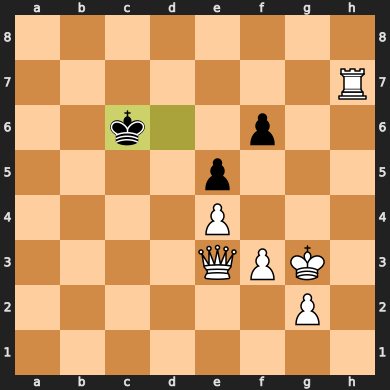

15.043032786885174
[Move.from_uci('c6b5'), Move.from_uci('c6d6'), Move.from_uci('c6d7'), Move.from_uci('c6b7'), Move.from_uci('c6c7')]


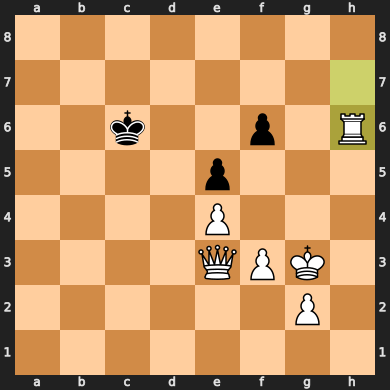

15.214344262294613
[Move.from_uci('e3c3'), Move.from_uci('e3c5'), Move.from_uci('e3d3'), Move.from_uci('e3b3'), Move.from_uci('e3b6'), Move.from_uci('e3e2'), Move.from_uci('h6f6'), Move.from_uci('h6h7'), Move.from_uci('h6h8'), Move.from_uci('h6g6'), Move.from_uci('h6h1'), Move.from_uci('h6h5'), Move.from_uci('h6h4'), Move.from_uci('h6h3'), Move.from_uci('h6h2'), Move.from_uci('e3f4'), Move.from_uci('e3d4'), Move.from_uci('g3f2'), Move.from_uci('g3g4'), Move.from_uci('e3g5'), Move.from_uci('e3f2'), Move.from_uci('e3d2'), Move.from_uci('g3h2'), Move.from_uci('e3e1'), Move.from_uci('e3a7'), Move.from_uci('e3a3'), Move.from_uci('e3g1'), Move.from_uci('e3c1'), Move.from_uci('g3h3'), Move.from_uci('g3h4'), Move.from_uci('f3f4')]


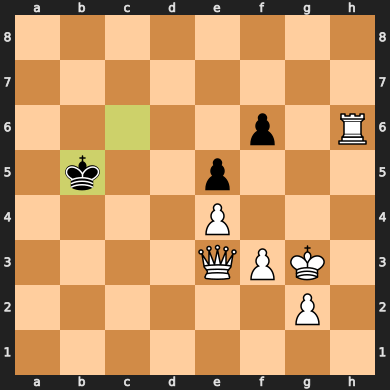

17.203770491802555
[Move.from_uci('b5b4'), Move.from_uci('b5c4'), Move.from_uci('b5a5'), Move.from_uci('b5a4')]


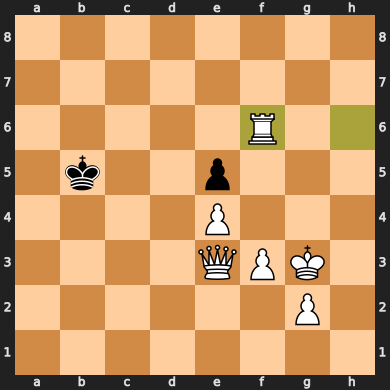

17.232459016393058
[Move.from_uci('f6e6'), Move.from_uci('f6b6'), Move.from_uci('e3c5'), Move.from_uci('e3d4'), Move.from_uci('e3c3'), Move.from_uci('e3b3'), Move.from_uci('e3b6'), Move.from_uci('e3d2'), Move.from_uci('e3e1'), Move.from_uci('e3a3'), Move.from_uci('f6f7'), Move.from_uci('f6f8'), Move.from_uci('f6g6'), Move.from_uci('f6d6'), Move.from_uci('f6c6'), Move.from_uci('f6f5'), Move.from_uci('f6f4'), Move.from_uci('e3f4'), Move.from_uci('e3d3'), Move.from_uci('g3f2'), Move.from_uci('g3g4'), Move.from_uci('f6h6'), Move.from_uci('f6a6'), Move.from_uci('e3g5'), Move.from_uci('e3f2'), Move.from_uci('e3e2'), Move.from_uci('g3h2'), Move.from_uci('e3a7'), Move.from_uci('e3h6'), Move.from_uci('e3g1'), Move.from_uci('e3c1'), Move.from_uci('g3h3'), Move.from_uci('g3h4'), Move.from_uci('f3f4')]


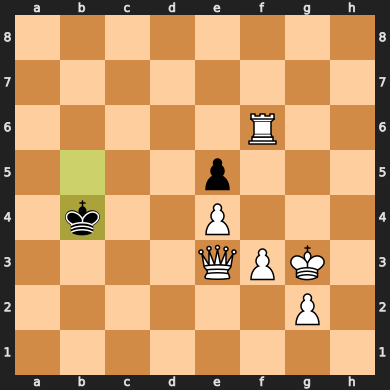

17.182459016391967
[Move.from_uci('b4c4'), Move.from_uci('b4c3'), Move.from_uci('b4a4'), Move.from_uci('b4a3')]


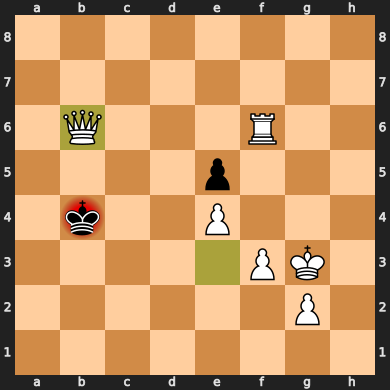

16.968524590163305
[Move.from_uci('b6e3'), Move.from_uci('b6e6'), Move.from_uci('b6c6'), Move.from_uci('b6c5'), Move.from_uci('b6d4'), Move.from_uci('b6b3'), Move.from_uci('f6c6'), Move.from_uci('b6c7'), Move.from_uci('b6b5'), Move.from_uci('b6b4'), Move.from_uci('b6a6'), Move.from_uci('f6f7'), Move.from_uci('b6b7'), Move.from_uci('b6d6'), Move.from_uci('f6f8'), Move.from_uci('f6g6'), Move.from_uci('f6e6'), Move.from_uci('f6d6'), Move.from_uci('f6f5'), Move.from_uci('f6f4'), Move.from_uci('b6f2'), Move.from_uci('b6b2'), Move.from_uci('g3f2'), Move.from_uci('g3g4'), Move.from_uci('f6h6'), Move.from_uci('b6d8'), Move.from_uci('b6a5'), Move.from_uci('g3h2'), Move.from_uci('b6b8'), Move.from_uci('b6a7'), Move.from_uci('b6g1'), Move.from_uci('b6b1'), Move.from_uci('g3h3'), Move.from_uci('g3h4'), Move.from_uci('f3f4')]


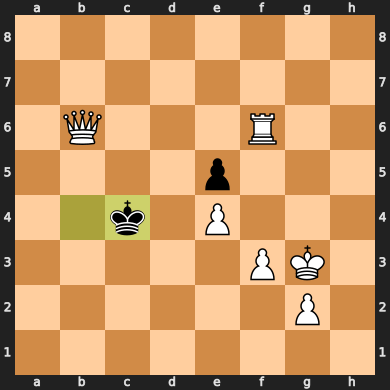

16.968524590163305
[Move.from_uci('c4d3')]


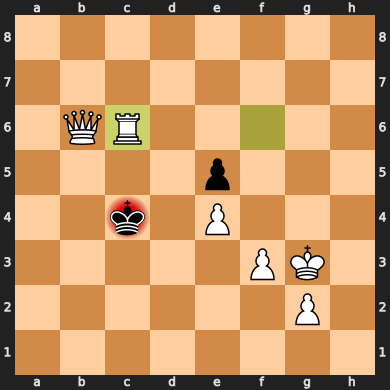

16.997213114752903
[Move.from_uci('c6c7'), Move.from_uci('b6d4'), Move.from_uci('b6e3'), Move.from_uci('b6b3'), Move.from_uci('c6d6'), Move.from_uci('c6c3'), Move.from_uci('b6b5'), Move.from_uci('b6d8'), Move.from_uci('b6a6'), Move.from_uci('b6b1'), Move.from_uci('c6c1'), Move.from_uci('b6b7'), Move.from_uci('b6c5'), Move.from_uci('c6c8'), Move.from_uci('c6g6'), Move.from_uci('c6f6'), Move.from_uci('c6e6'), Move.from_uci('c6c5'), Move.from_uci('c6c4'), Move.from_uci('c6c2'), Move.from_uci('b6c7'), Move.from_uci('b6b4'), Move.from_uci('b6f2'), Move.from_uci('b6b2'), Move.from_uci('g3f2'), Move.from_uci('g3g4'), Move.from_uci('c6h6'), Move.from_uci('b6a5'), Move.from_uci('g3h2'), Move.from_uci('b6b8'), Move.from_uci('b6a7'), Move.from_uci('b6g1'), Move.from_uci('g3h3'), Move.from_uci('g3h4'), Move.from_uci('f3f4')]


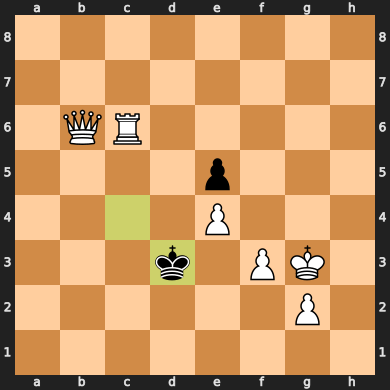

17.047213114753994
[Move.from_uci('d3e2'), Move.from_uci('d3d4'), Move.from_uci('d3d2')]


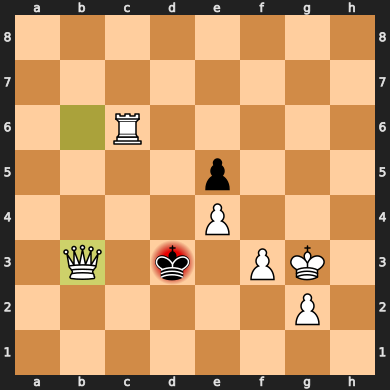

17.261147540982655
[Move.from_uci('c6c2'), Move.from_uci('b3c4'), Move.from_uci('b3e3'), Move.from_uci('b3d3'), Move.from_uci('b3c2'), Move.from_uci('b3b5'), Move.from_uci('b3b2'), Move.from_uci('b3d1'), Move.from_uci('b3a2'), Move.from_uci('c6c7'), Move.from_uci('c6c1'), Move.from_uci('c6c8'), Move.from_uci('c6g6'), Move.from_uci('c6f6'), Move.from_uci('c6e6'), Move.from_uci('c6d6'), Move.from_uci('c6b6'), Move.from_uci('c6c5'), Move.from_uci('c6c4'), Move.from_uci('c6c3'), Move.from_uci('b3b7'), Move.from_uci('b3e6'), Move.from_uci('b3d5'), Move.from_uci('b3c3'), Move.from_uci('g3g4'), Move.from_uci('c6h6'), Move.from_uci('c6a6'), Move.from_uci('b3f7'), Move.from_uci('b3b6'), Move.from_uci('b3b4'), Move.from_uci('b3a4'), Move.from_uci('g3h2'), Move.from_uci('b3g8'), Move.from_uci('b3b8'), Move.from_uci('b3a3'), Move.from_uci('b3b1'), Move.from_uci('g3h3'), Move.from_uci('g3h4'), Move.from_uci('f3f4')]


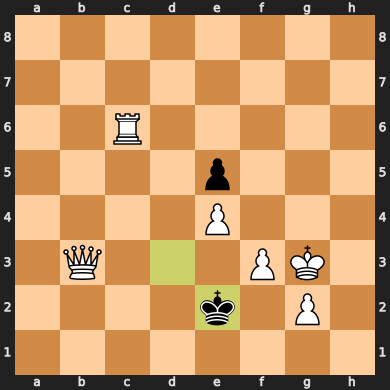

17.26114754098266
[Move.from_uci('e2f1'), Move.from_uci('e2e1'), Move.from_uci('e2d1')]


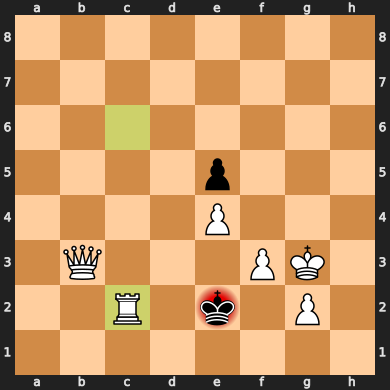

17.446393442621723
[Move.from_uci('b3b1'), Move.from_uci('c2c1'), Move.from_uci('b3c4'), Move.from_uci('b3d3'), Move.from_uci('c2f2'), Move.from_uci('b3b5'), Move.from_uci('c2c7'), Move.from_uci('b3b7'), Move.from_uci('b3e6'), Move.from_uci('b3d5'), Move.from_uci('b3e3'), Move.from_uci('b3c3'), Move.from_uci('c2c8'), Move.from_uci('c2c6'), Move.from_uci('c2c5'), Move.from_uci('c2c4'), Move.from_uci('c2c3'), Move.from_uci('c2e2'), Move.from_uci('c2d2'), Move.from_uci('c2b2'), Move.from_uci('g3g4'), Move.from_uci('b3f7'), Move.from_uci('b3b6'), Move.from_uci('b3b4'), Move.from_uci('b3a4'), Move.from_uci('b3b2'), Move.from_uci('c2a2'), Move.from_uci('g3h2'), Move.from_uci('b3g8'), Move.from_uci('b3b8'), Move.from_uci('b3a3'), Move.from_uci('b3a2'), Move.from_uci('g3h3'), Move.from_uci('g3h4'), Move.from_uci('f3f4')]


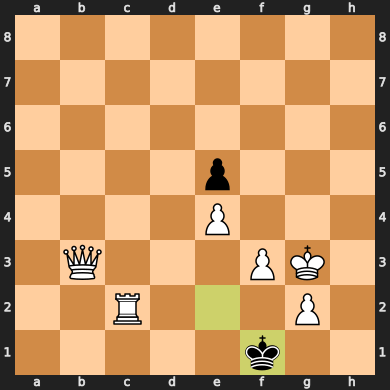

9999
[]


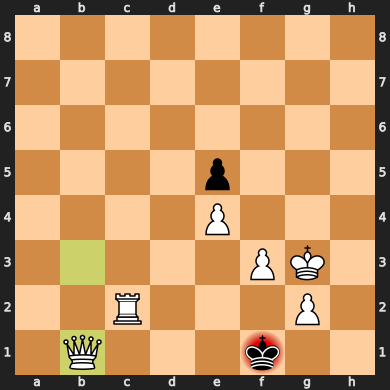

In [5]:
import chess.pgn
pgn = chess.pgn.Game()   
pgn.headers["White"] = 'Me'
pgn.headers["Black"] = 'Chess Bot'

node = pgn

board = chess.Board()

for move in chess_bot.board.move_stack:
    board.push(move)
    node = node.add_variation(move)
    chess_bot.transposition_table.zobrist_hash(board)
    print(chess_bot.evaluate(board))
    print(chess_bot.get_ordered_moves(board))
    display(board)

with open("chess_game.pgn", "w") as pgn_file:
    pgn_file.write(str(pgn))

In [7]:
import chess
from bot import Bot
board = chess.Board()
board.push_san("e4")
board.push_san("e5")
board.push_san("Nf3")
bot.zobrist_hash(board)


print(bot.get_endgame_weight(board))
print(bot.get_ordered_moves(board))

NameError: name 'original_bot' is not defined

## Other Testing

In [6]:
fen = "rnbqkbnr/pp2pppp/2p5/3p4/8/4PN2/PPPP1PPP/RNBQKB1R"
board = chess.Board(fen)
from bot import Bot
bot = Bot()
print(bot.get_ordered_moves(board))
print(board)

        
        

[Move.from_uci('b1c3'), Move.from_uci('f1d3'), Move.from_uci('c2c4'), Move.from_uci('f1b5'), Move.from_uci('f1c4'), Move.from_uci('f3e5'), Move.from_uci('f3d4'), Move.from_uci('f1e2'), Move.from_uci('d1e2'), Move.from_uci('h1g1'), Move.from_uci('f1a6'), Move.from_uci('e1e2'), Move.from_uci('b1a3'), Move.from_uci('f3g5'), Move.from_uci('f3h4'), Move.from_uci('f3g1'), Move.from_uci('d2d4'), Move.from_uci('e3e4'), Move.from_uci('d2d3'), Move.from_uci('h2h4'), Move.from_uci('a2a4'), Move.from_uci('h2h3'), Move.from_uci('a2a3'), Move.from_uci('g2g3'), Move.from_uci('b2b3'), Move.from_uci('g2g4'), Move.from_uci('b2b4'), Move.from_uci('c2c3')]
r n b q k b n r
p p . . p p p p
. . p . . . . .
. . . p . . . .
. . . . . . . .
. . . . P N . .
P P P P . P P P
R N B Q K B . R


In [4]:
attackers = board.attackers(king.color, s)
print(attackers)


. . . 1 . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
